<h1>Predict Customer Clicked Ads Classification by Using Machine Learning</h1><br>

Sebuah perusahaan di Indonesia ingin mengetahui efektifitas sebuah iklan yang mereka tayangkan, hal ini penting bagi perusahaan yang bergerak di bidang consultant digital marketing agar dapat mengetahui seberapa besar ketercapainnya iklan yang dipasarkan sehingga dapat menarik customers untuk melihat iklan.

<h2>Tentang Dataset</h2><br>

<b>Konteks</b><br>
Kumpulan data iklan dari sebuah agensi pemasaran. Tujuannya adalah untuk mengembangkan algoritma ML yang dapat memprediksi apakah pengguna tertentu akan mengklik sebuah iklan.

<b>Konten</b><br>
Kumpulan data yang digunakan untuk membangun model berisi 1003 observasi dari 11 variabel.
Data berisi informasi berikut:

* <b>Unnamed: 0</b>: Nomor urutan
* <b>Daily Time Spent on Site</b>: Waktu konsumen di website dalam menit
* <b>Age</b>: Umur konsumen dalam satuan tahun
* <b>Area Income</b>: Rata-rata pendapatan konsumen
* <b>Daily Internet Usage</b>: Rata-rata per menit penggunaan internet konsumen
* <b>Male</b>: Apakah konsumen berjenis kelamin laki-laki atau tidak
* <b>Timestamp</b>: Waktu saat konsumen mengklik iklan atau menutup iklan
* <b>Clicked on Ad</b>: 0 atau 1 mengindikasi klik iklan
* <b>city</b>: Kota konsumen
* <b>province</b>: Provinsi konsumen
* <b>category</b>: Kategori

<h2>Identifikasi Data</h2><br>
Langkah pertama yang dilakukan adalah mengenali data, menetapkan variabel tergantung (target) dan variabel bebas (independen), serta memeriksa apakah dalam data tersebut sudah bersih atau masih terdapat data yang hilang.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
317,317,73.38,25,371412370.0,236.19,Laki-Laki,4/21/2016 9:30,No,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Travel
78,78,56.14,38,228823280.0,113.53,Laki-Laki,2/3/2016 7:59,Yes,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Food
306,306,84.79,33,432403300.0,214.53,Perempuan,3/30/2016 19:09,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Otomotif
79,79,55.13,45,389241440.0,111.71,Perempuan,2/17/2016 21:55,Yes,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Fashion
788,788,85.62,29,399226520.0,195.68,Perempuan,4/14/2016 21:37,No,Malang,Jawa Timur,Furniture


In [3]:
#Menampilkan informasi tipe data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [4]:
#Mendeteksi baris yang kosong
df.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [5]:
df = df.dropna()
print("\nDataFrame setelah menghapus baris dengan nilai kosong:")
print(df)


DataFrame setelah menghapus baris dengan nilai kosong:
     Unnamed: 0  Daily Time Spent on Site  Age  Area Income  \
0             0                     68.95   35  432837300.0   
1             1                     80.23   31  479092950.0   
2             2                     69.47   26  418501580.0   
3             3                     74.15   29  383643260.0   
4             4                     68.37   35  517229930.0   
..          ...                       ...  ...          ...   
994         994                     43.70   28  441888720.0   
995         995                     72.97   30  499691990.0   
996         996                     51.30   45  474475190.0   
998         998                     55.55   19  293445530.0   
999         999                     45.01   26  209130600.0   

     Daily Internet Usage       Male        Timestamp Clicked on Ad  \
0                  256.09  Perempuan   3/27/2016 0:53            No   
1                  193.77  Laki-Laki    4/4/2

In [6]:
df.isna().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

In [7]:
#Mendeteksi duplikasi baris
df.duplicated().sum()

0

Setelah dianalisis dapat diambil analisis sementara:
1. <b>Variabel Dependen</b> dari data tersebut adalah <b>Click on Ad</b> dimana luaran dari kolom tersebut adalah 1 untuk mengklik iklan dan 0 untuk tidak mengklik.
2. <b>Variabel Independen</b> dari data tersebut adalah Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, Male, Timestamp, city, province, category.  
4. Terdapat tipe kolom yang tidak sesuai dan perlu di ubah.
   * Tipe kolom 'Male' seharusnya bertipe interger.
   * Tipe kolom 'Clicked on Ad' seharusnya bertipe interger.
6. Kolom Unnamed: 0 tidak termasu variabel idependen karena hanya melabelkan identitas pelanggan.
7. Ditermukan baris bernilai kosong pada kolom Daily Time Spent on Site, Area Income, Daily Internet Usage, Male. Jumlah baris kosong kurang dari 5% jadi akan di dilakukan drop baris.
8. Tidak ditemukan data duplikat.

<h2>Mendeskripsikan & Mengelompokkan Data</h2><br>
Fungsi mendeskripsikan dan mengelompokkan data sangat krusial dalam analisis data, khususnya dalam konteks pengambilan keputusan yang didasarkan pada data. Tujuannya adalah untuk memberikan wawasan umum mengenai data yang ada, termasuk seberapa besar variasi, distribusi, dan pola yang terlihat. Selain itu, juga untuk memisahkan data ke dalam beberapa kategori sehingga setiap kategori memiliki ciri atau karakteristik yang serupa.

In [8]:
# Mengubah kolom 'Male': 1 untuk laki-laki, 0 untuk perempuan
df['Male'] = df['Male'].apply(lambda x: 1 if x == 'Laki-Laki' else 0).astype(int)

# Mengubah kolom 'Clicked on Ad': 1 untuk 'yes', 0 untuk 'no'
df['Clicked on Ad'] = df['Clicked on Ad'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)

In [9]:
df.sample (5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
621,621,87.85,31,365252860.0,210.27,1,6/14/2016 19:48,0,Bogor,Jawa Barat,Otomotif
24,24,41.39,41,482736240.0,167.22,0,6/13/2016 17:27,1,Denpasar,Bali,Electronic
770,770,71.14,30,488308170.0,224.82,0,6/21/2016 0:52,0,Depok,Jawa Barat,House
606,606,69.50,26,478442930.0,203.84,0,2/27/2016 13:51,0,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Health
883,883,41.53,42,473025840.0,158.81,0,5/23/2016 0:32,1,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Electronic


In [10]:
#Pengelompokan data berdasarkan jenisnya
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['int64', 'float64','int32']).columns.tolist()

In [11]:
# Mendeskripsikan data kategori
df[categorical_cols].describe()

,Timestamp,city,province,category
count,963,963,963,963
unique,960,30,16,10
top,5/26/2016 15:40,Bandung,Daerah Khusus Ibukota Jakarta,Otomotif
freq,2,64,244,108


In [12]:
#Mendeskripsikan data kategori berdasarkan tiap kolom
for col in categorical_cols:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Timestamp:
Timestamp
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/20/2016 0:00     1
6/13/2016 11:06    1
                  ..
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
4/18/2016 0:49     1
6/3/2016 21:43     1
Name: count, Length: 960, dtype: int64

Value count kolom city:
city
Bandung              64
Surabaya             61
Jakarta Timur        60
Jakarta Selatan      59
Jakarta Barat        57
Bekasi               55
Medan                47
Jakarta Utara        43
Semarang             39
Palembang            39
Batam                34
Tangerang Selatan    32
Tangerang            31
Depok                30
Bandar Lampung       28
Makassar             28
Bogor                27
Malang               26
Jakarta Pusat        25
Banjarmasin          22
Pakanbaru            21
Denpasar             19
Padang               19
Balikpapan           18
Cimahi               16
Samarinda            15
Tasikmalaya          13
Surakarta    

Analisis data kategorikal menunjukkan:
1. Timestamp Unik: Mayoritas entri memiliki waktu yang unik, menunjukkan bahwa data mencakup berbagai momen aktivitas.
2. Dominasi Kota dan Provinsi: <b>Kota Bandung</b> dan <b>Provinsi DKI Jakarta</b> memiliki jumlah data terbanyak.
3. Kategori: <b>Kategori Otomotif</b> sebagai kategori teratas, ini mengindikasikan bahwa sektor ini mungkin sedang berkembang atau memiliki perhatian besar di pasar.

In [13]:
#Mendeskripsikan data numerik
df[numeric_cols].describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,963.000000,963.000000,963.000000,9.630000e+02,963.000000,963.000000,963.000000
mean,499.855659,64.829200,36.049844,3.855628e+08,179.716106,0.478712,0.503634
std,286.827132,15.892075,8.764154,9.380390e+07,43.867289,0.499806,0.500247
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000,0.000000,0.000000
25%,253.500000,50.600000,29.000000,3.296658e+08,138.615000,0.000000,0.000000
50%,499.000000,68.010000,35.000000,3.991039e+08,182.200000,0.000000,1.000000
75%,749.500000,78.365000,42.000000,4.591870e+08,218.550000,1.000000,1.000000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000,1.000000,1.000000


Analisis kolom numerikal didapatkan:
1. Target Demografi:
   * Sebagian besar pengguna adalah orang dewasa muda (29–42 tahun), dengan distribusi gender yang hampir seimbang.
   * Pendapatan wilayah rata-rata cukup tinggi, menunjukkan daya beli yang baik.
2. Kebiasaan Online:
   * Waktu harian di situs berkisar antara 50–78 menit, sedangkan penggunaan internet harian sekitar 3 jam.
   * Pengguna dengan waktu internet tinggi (>218 menit) mungkin lebih mudah dijangkau melalui iklan online.
3. Efektivitas Iklan: Tingkat klik yang cukup seimbang (50%) menunjukkan potensi yang baik untuk meningkatkan keterlibatan melalui strategi iklan yang lebih terarah.
4. Segmen Pasar:
   * Umur: Fokus pada pengguna berumur 29–42 tahun.
   * Pendapatan: Wilayah dengan pendapatan di atas rata-rata (>459 juta) dapat dijadikan prioritas.

<h2>Analisis Data</h2><br>

1. <b> Unvariat Analysis</b> dianalisis dengan 3 plot, yaitu:<br>
    a. <b>Violin Plot</b> untuk melihat apakah setiap variabel memiliki data outlier atau tidak<br>
    b. <b>Bar Plot</b> untuk melihat distribusi setiap variabel independen berdasarkan variabel dependen, apakah pengiriman barang tepat waktu atau tidak<br>
    c. <b>Density Plot</b> untuk melihat distribusi data apakah normal atau tidak<br>
2. <b>Multivariate Analysis</b> dianalisis dengan 2 plot, yaitu:<br>
    a. <b>Heatmap</b> untuk representasi visual dari korelasi antara berbagai variabel.<br>
    b. <b>Pair Plot</b> untuk memberikan gambaran menyeluruh tentang hubungan antar variabel dalam dataset.

In [11]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<h3>1. Unvariat Analysis</h3>

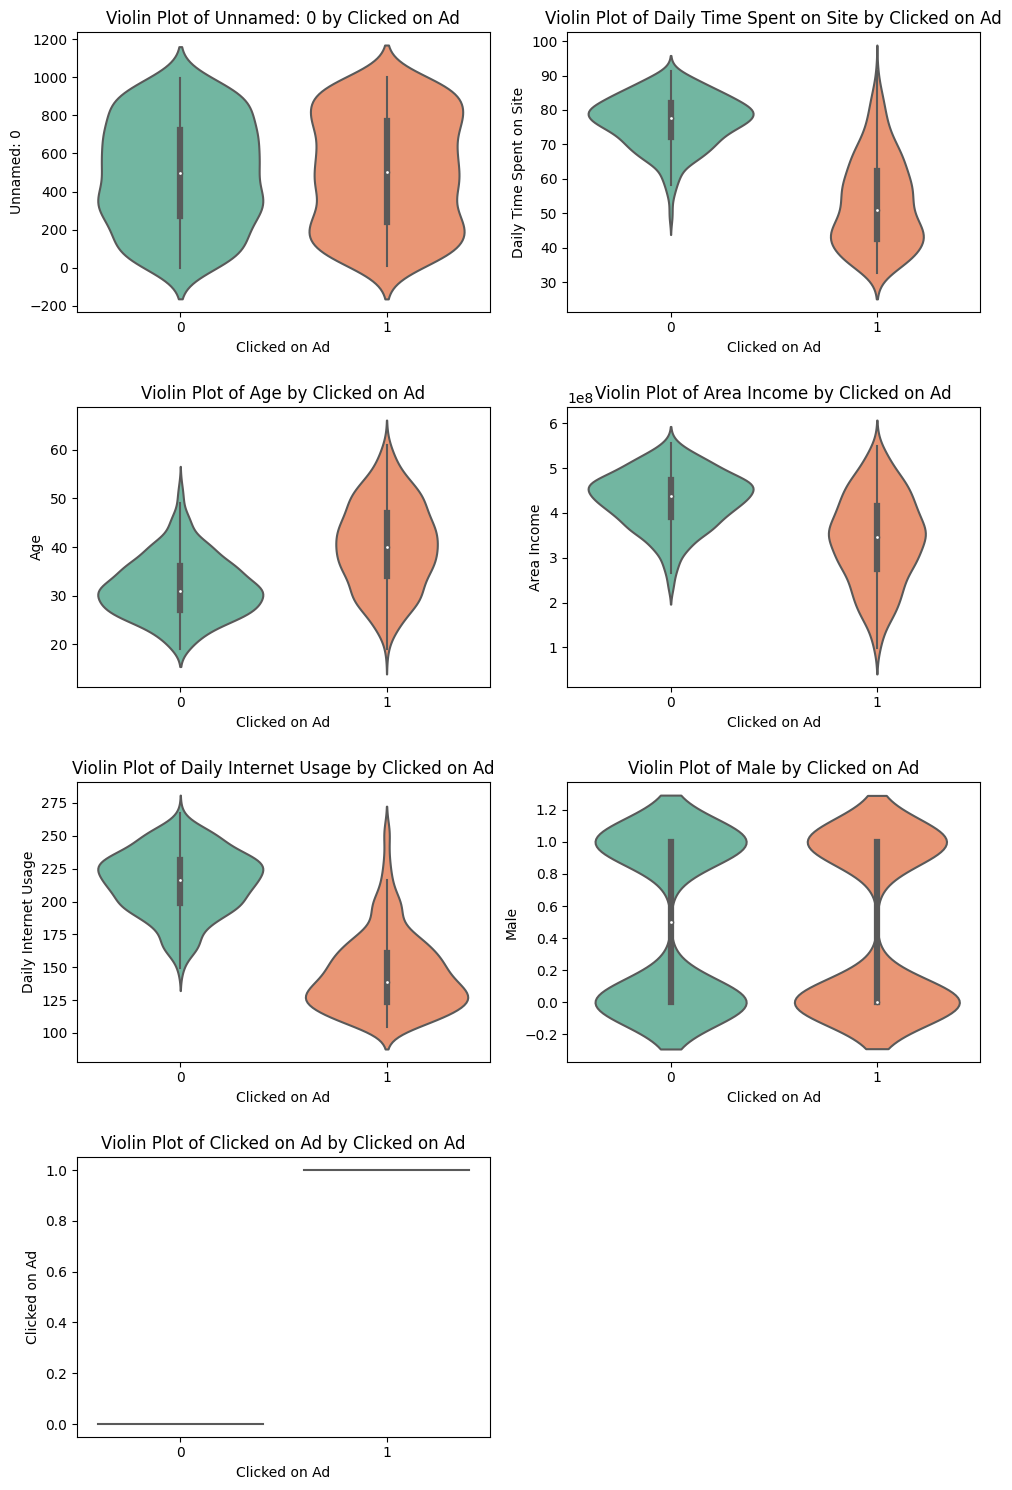

In [15]:
# Univariate Analysis menggunakan violin plot

plt.figure(figsize=(10, 15))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 2 + 1, 2, i + 1)  # Adjusting the grid layout for subplots
    sns.violinplot(x='Clicked on Ad', y=col, data=df, palette="Set2")
    plt.title(f"Violin Plot of {col} by Clicked on Ad")
    plt.xlabel('Clicked on Ad')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Analisis violin plot dihasilkan beberapa poin:
1. Plot Daily Time Spent terhadap Clicked on Ad menunjukkan yang meng-klik memiliki lebar atau puncaknya bergeser ke kanan dibandingkan dengan yang tidak mengklil, badan yang lebih lebar menunjjukkan area dengan kepadatan yag lebih tinggi dalam data.
2. Plot Age terhadap Clicked on Ad menunjukkan kelompok uasia yang lebih cenderung meng-klik iklan dibandinkan yang tidak.

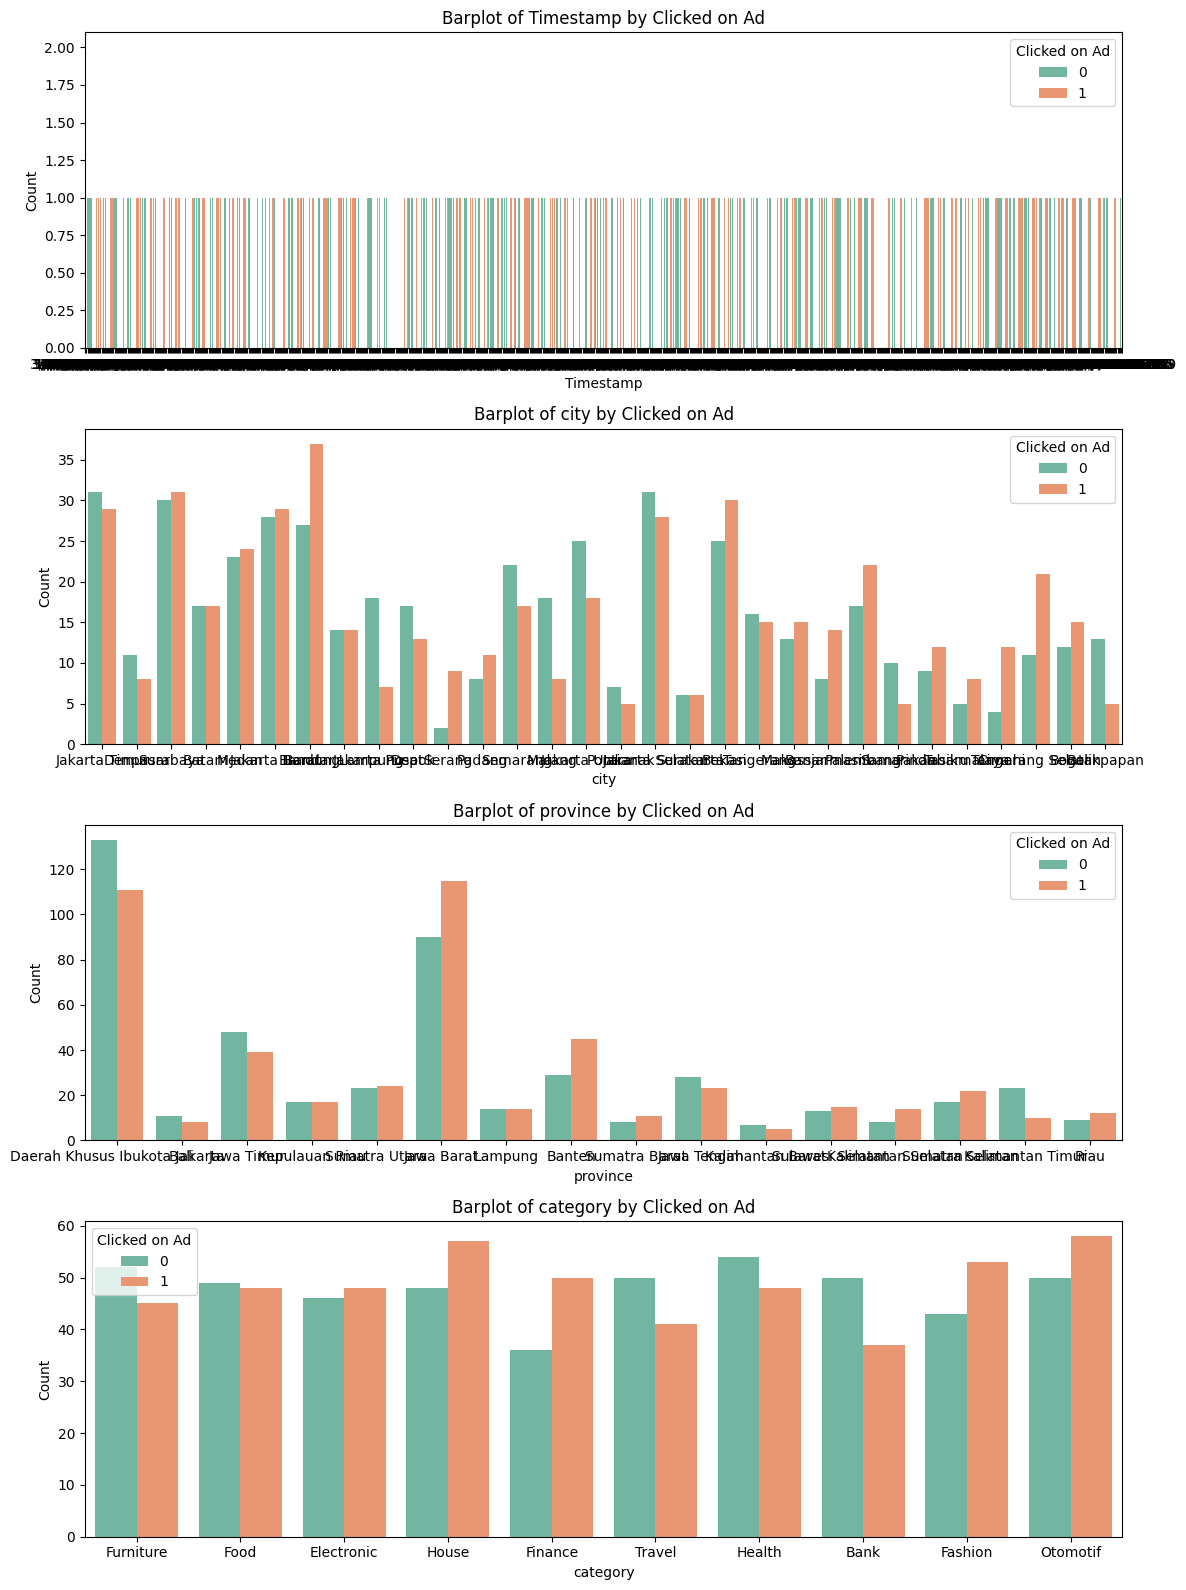

In [16]:
# Univariate Analysis menggunakan barplot

plt.figure(figsize=(12, len(categorical_cols) * 4))  # Adjust height based on number of categorical columns

# Loop through each categorical column
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)  # One column, multiple rows
    sns.countplot(x=col, hue='Clicked on Ad', data=df, palette="Set2")
    plt.title(f"Barplot of {col} by Clicked on Ad")
    plt.xlabel(col)
    plt.ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

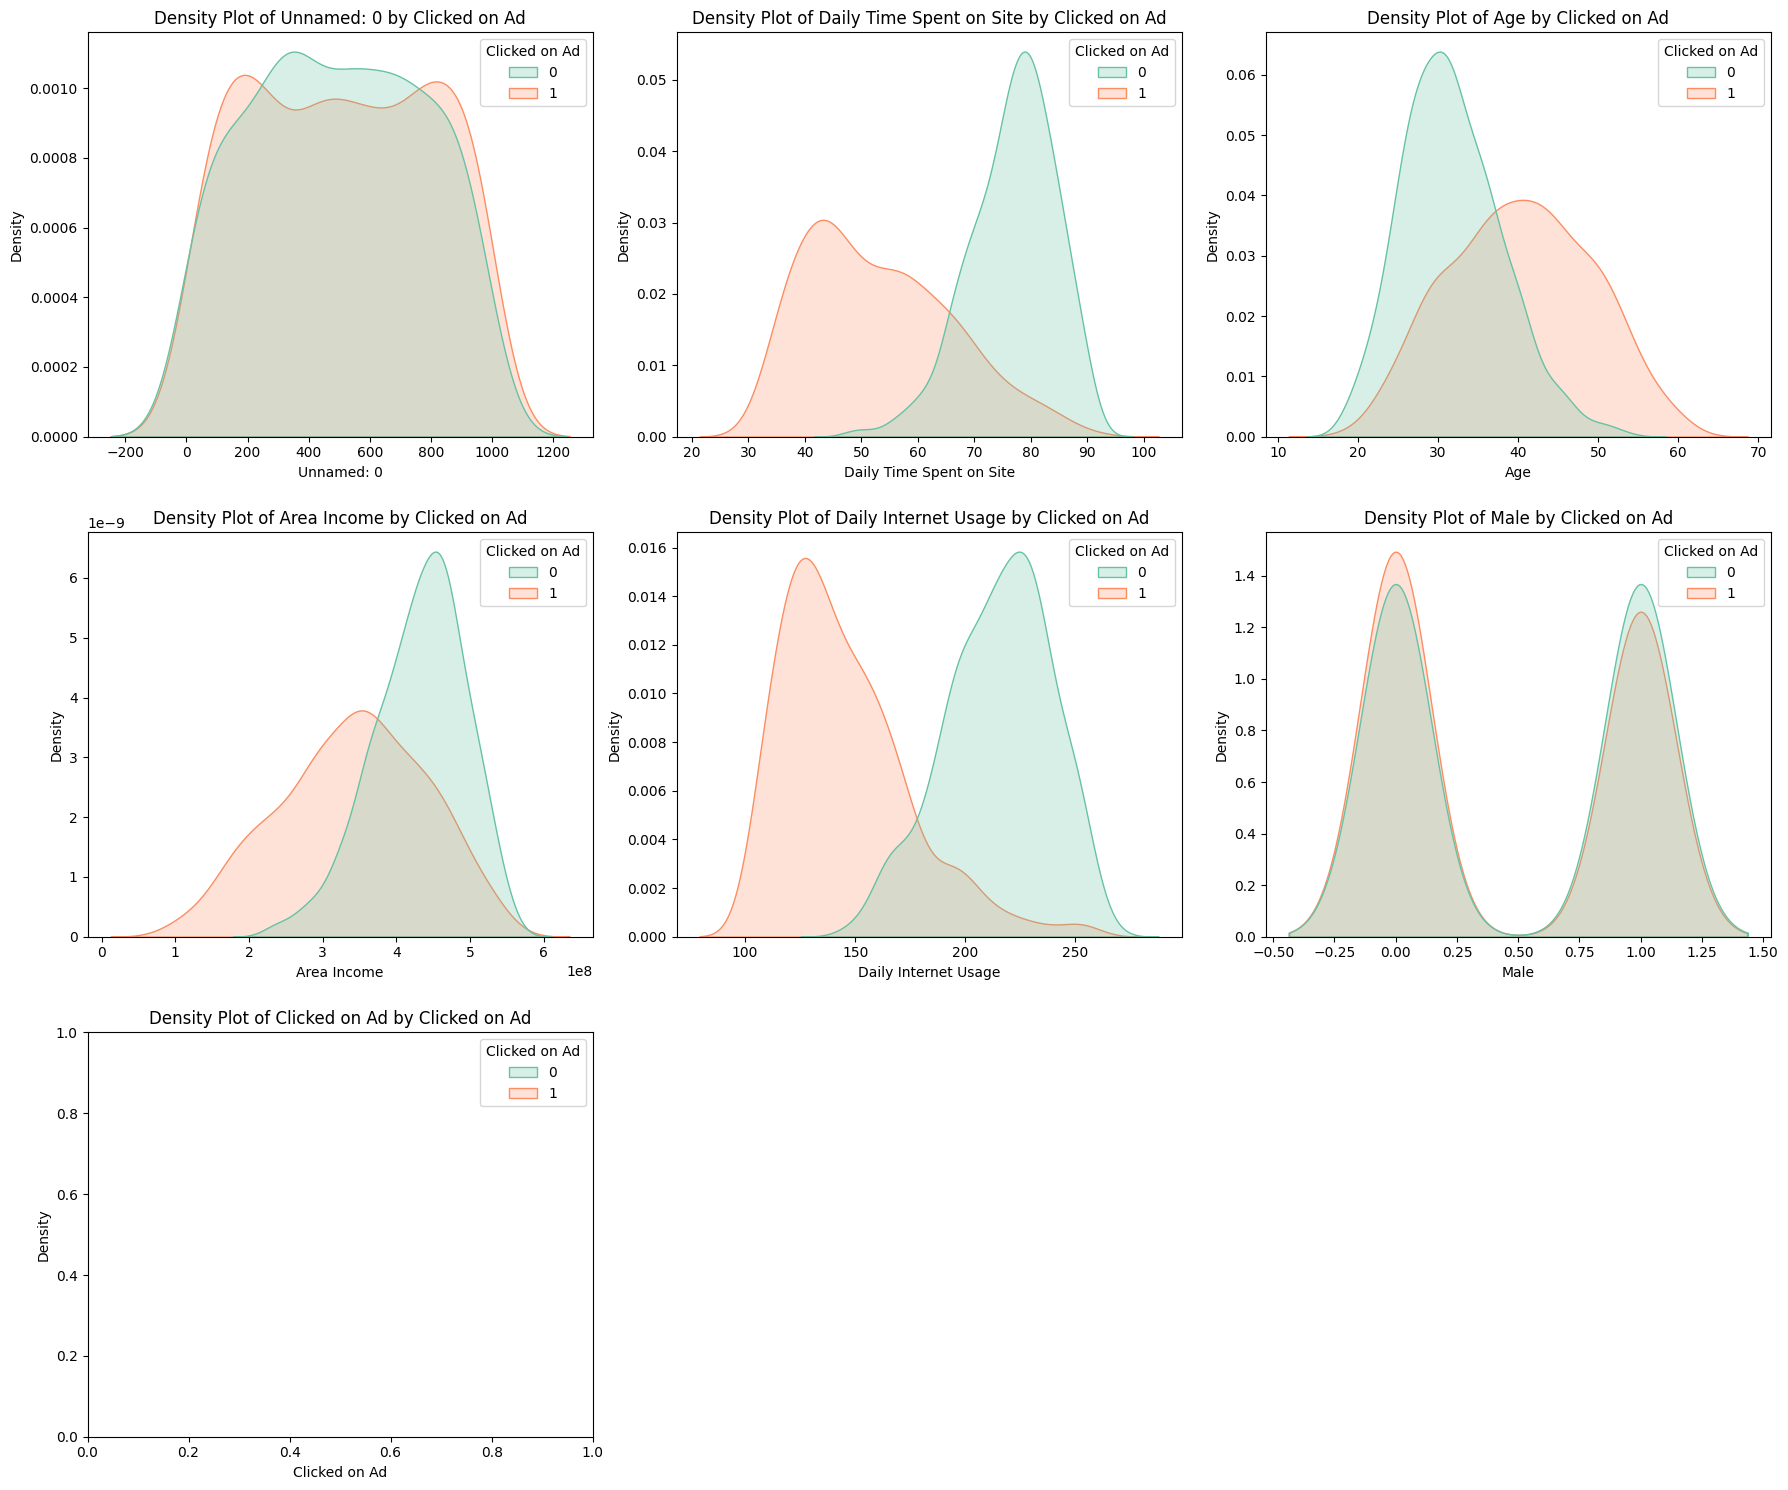

In [17]:
# Univariate Analysis menggunakan density plot

num_cols = len(numeric_cols)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

plt.figure(figsize=(18, num_rows * 5))  # Adjust figsize for better readability

for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 3, i + 1)  # Adjust layout to fit 3 columns
    sns.kdeplot(data=df, x=col, hue='Clicked on Ad', fill=True, common_norm=False, palette='Set2')
    plt.title(f"Density Plot of {col} by Clicked on Ad")
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

Analisis density plot pada Daily Time Spent on Site terhadap Clicked on Ad menunjukkan kurva yang bergeser ke arah kanan hal ini menunjukkan bahwa pengguna cenderung menghabiskan lebih banyak waktu di situs dibandingkan dengan pengguna yang tidak mengklik iklan.

<h3>2. Analisis Bivariate</h3>

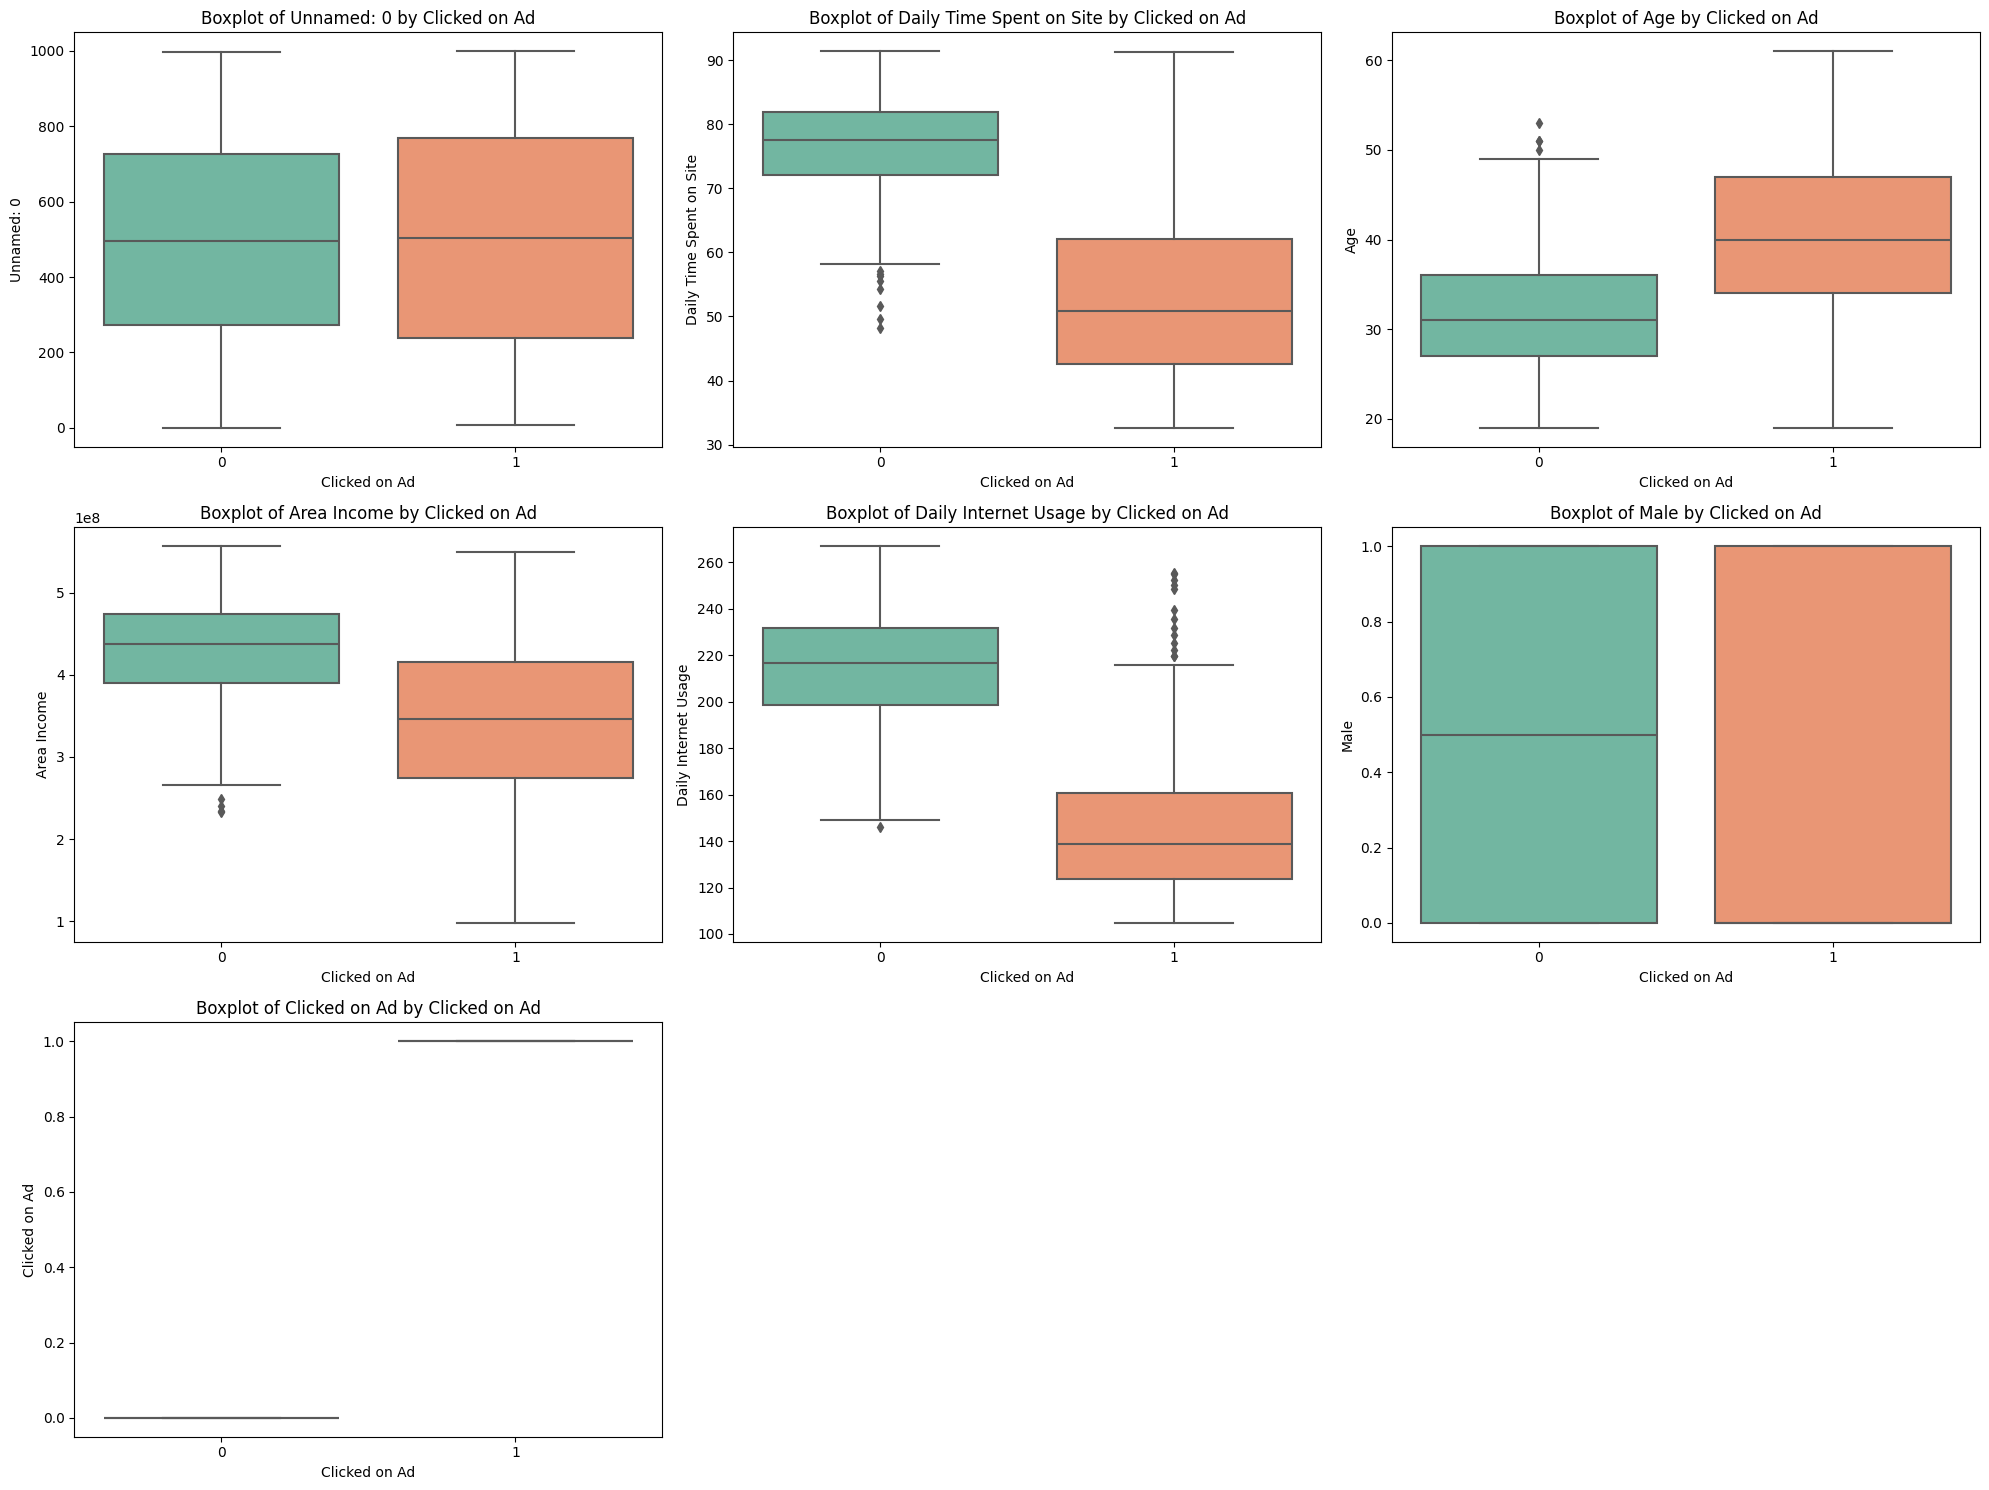

In [18]:
# Bivariate Analysis menggunakan boxplot

plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i + 1)  # Adjusting layout based on number of numerical columns
    sns.boxplot(x='Clicked on Ad', y=col, data=df, palette="Set2")
    plt.title(f"Boxplot of {col} by Clicked on Ad")
    plt.xlabel('Clicked on Ad')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Hasil analisis bivariate di temukan:
1. Kolom Daily Time Spent on Site terhadap Clicked on Ad memiliki outliers, mengindikasikan pengguna yang menghabiskan lebih banyak waktu di site secara signifikan daripada yang lain.
2. Kolom Area Income terhadap Clicked on Ad memiliki kotak yang sempit mengindikasikan lebih sedikit variabilits, sementara kotak yang lebar menunjukkan rentang pendapatan yang lebih luas.
3. Kolom Daily Internet Usage terhadap Clicked on Ad menunjukkan adanya outliers.

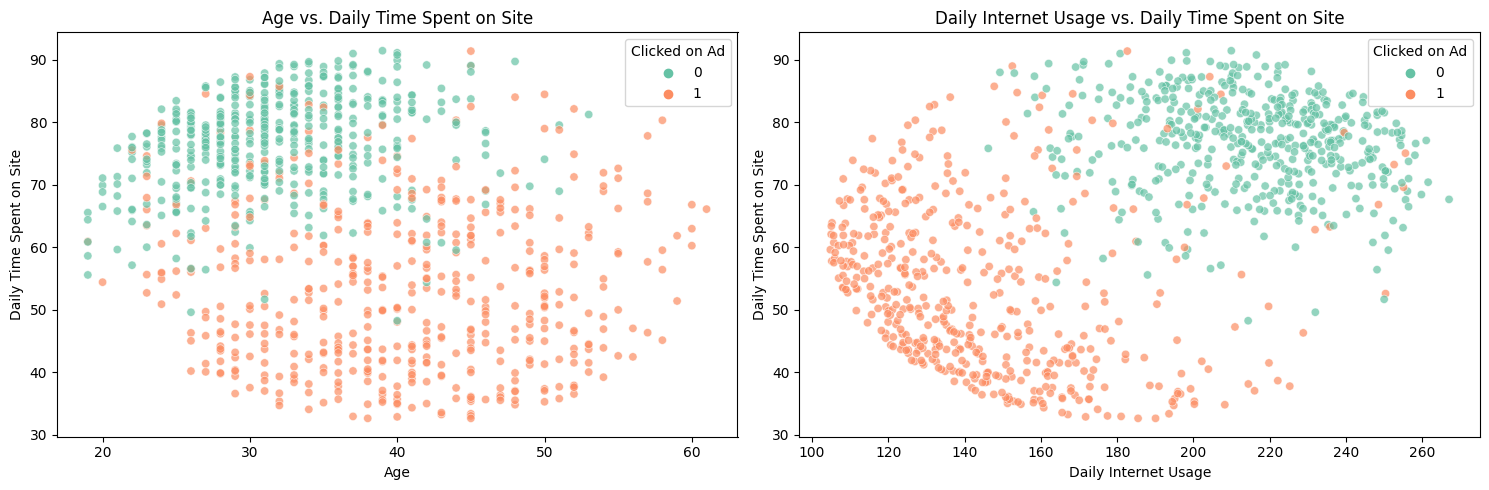

In [19]:
#Bivariate Analysis kolom Age, Daily Internet Usage, dan Daily Time Spent on Site

plt.figure(figsize=(15, 5))

# Scatter plot: Age vs. Daily Time Spent on Site
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Age'], y=df['Daily Time Spent on Site'], hue=df['Clicked on Ad'], palette='Set2', alpha=0.7)
plt.title('Age vs. Daily Time Spent on Site')
plt.xlabel('Age')
plt.ylabel('Daily Time Spent on Site')

# Scatter plot: Daily Internet Usage vs. Daily Time Spent on Site
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Daily Internet Usage'], y=df['Daily Time Spent on Site'], hue=df['Clicked on Ad'], palette='Set2', alpha=0.7)
plt.title('Daily Internet Usage vs. Daily Time Spent on Site')
plt.xlabel('Daily Internet Usage')
plt.ylabel('Daily Time Spent on Site')

plt.tight_layout()
plt.show()

Hasil analisis scatter plot:
1. Age vs. Daily Time Spent on Site: Tidak ada tren linier yang jelas terlihat, titik-titik data agak tersebar menunjukkan korelasi linier lemah atau tidak ada sama sekali.
2. Daily Internet Usage vs. Daily Time Spent on Site: Plot menunjukkan korelasi yang agak positif, hubungan tidak linear sempurna terdapat beberapa sebaran tetapi tren kenaika secara umum terlihat.

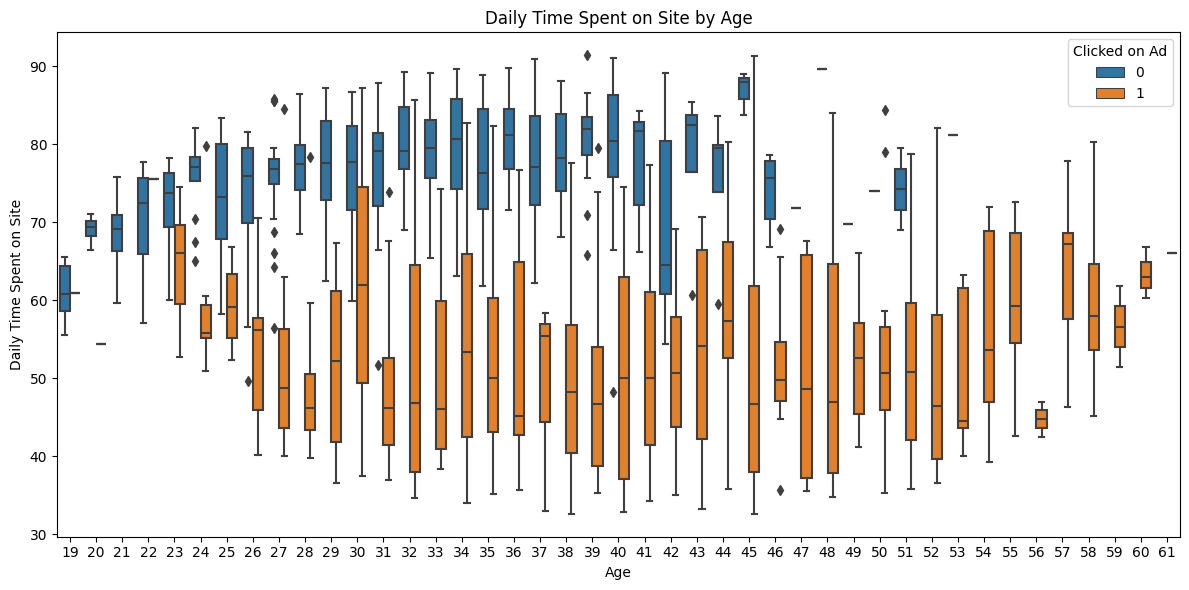

In [20]:
plt.figure(figsize=(12, 6))

# Boxplot: Daily Time Spent on Site by Age group
sns.boxplot(x='Age', y='Daily Time Spent on Site', hue='Clicked on Ad', data=df)
plt.title('Daily Time Spent on Site by Age')
plt.xlabel('Age')
plt.ylabel('Daily Time Spent on Site')

plt.tight_layout()
plt.show()

Hasil observasi:
1. No Clear Age Trend: Tidak ada tren yang kuat secara keseluruhan yang menunjukkan hubungan antar Age dan Daily Time Spent on The Site. Median (garis dalam kotak) tidak secara konsisten naik atau turun seiring bertambahnya usia. Distribusi waktu yang dihabiskan tampak relatif konsisten di seluruh rentang usia.
2. Variability: Ada variasi yang cukup besar dalam waktu yang di habiskan pengguna dengan usia yang sama.
3. Outliers: Terlihat beberapa outliers ini mewakili pengguna yang menghabiskan lebih banyak atau lebih sedikit waktu di situs dibandingkan pengguna lain dalam kelompok usia mereka.
4. Ad Click Impact (Minimal): Waktu yang dihabiskan pengguna di situs tidak secara kuat memprediksi apakah mereka akan meng-klik iklan.

<h3>3. Analisis Multivariasi</h3>

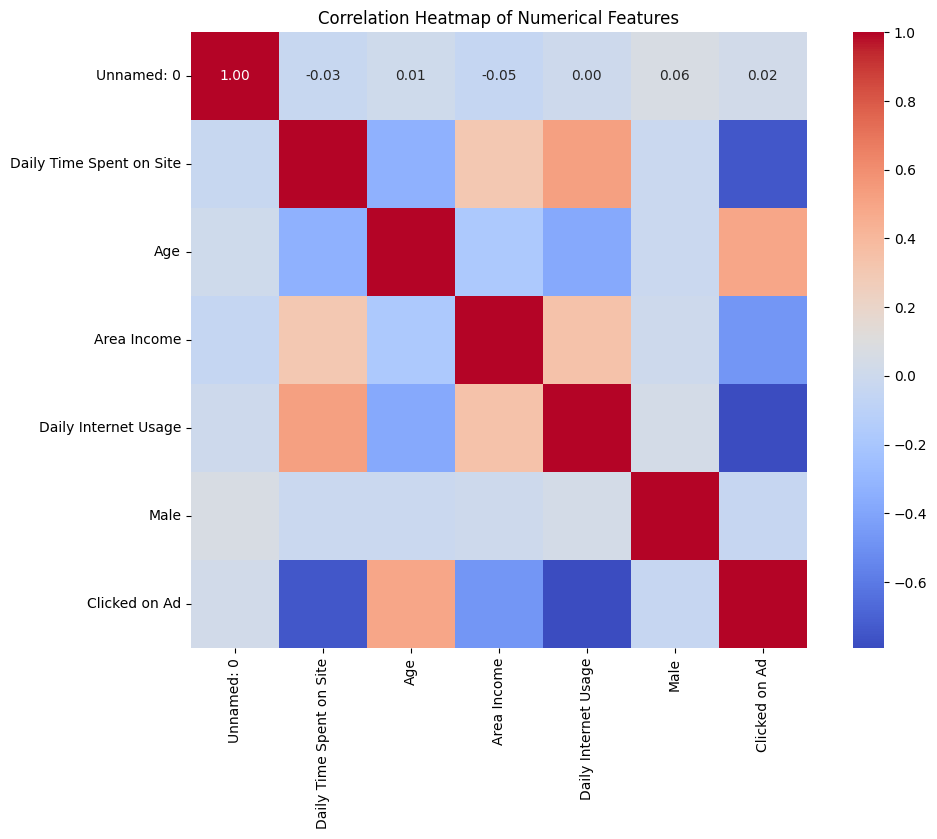

In [21]:
# Heatmap untuk korelasi numerik

# Menghitung korelasi matrix untuk kolom numerikal
correlation_matrix = df[numeric_cols].corr()

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Hail dari analisis heatmap menunjukkan:
1. Korelasi antara Daily Time Spent on Site dengan Clicked on Ad bernilai positif, bahwa pengguna menghabiskan lebih banyak waktu di website dan mereka cenderung mengklik iklan.
2. Korelasi antara Age dengan Clicked on Ad memiliki nilai rendah, usia mungkin tidak secara signifikan mempengaruhi klik iklan.
3. Korelasi Area Income dengan Clicked on Ad memiliki korelasi lemah, tingkat pendapatan mungkin tidak secara dramatis mempengaruhi perilaku mengklik.
4. Korelasi Daily Internet Usage dengan Clicked on Ad memiliki niali positif, hal ini menunjukkan bahwa pengguna yang menghabiskan lebih banyak waktu online mungkin juga lebih seing mengklik iklan.
5. Korelasi antara Male dengan Clicked on Ad memiliki nilai korelasi lemah, hal ini mungkin menyiratkan target yang lebih universal.

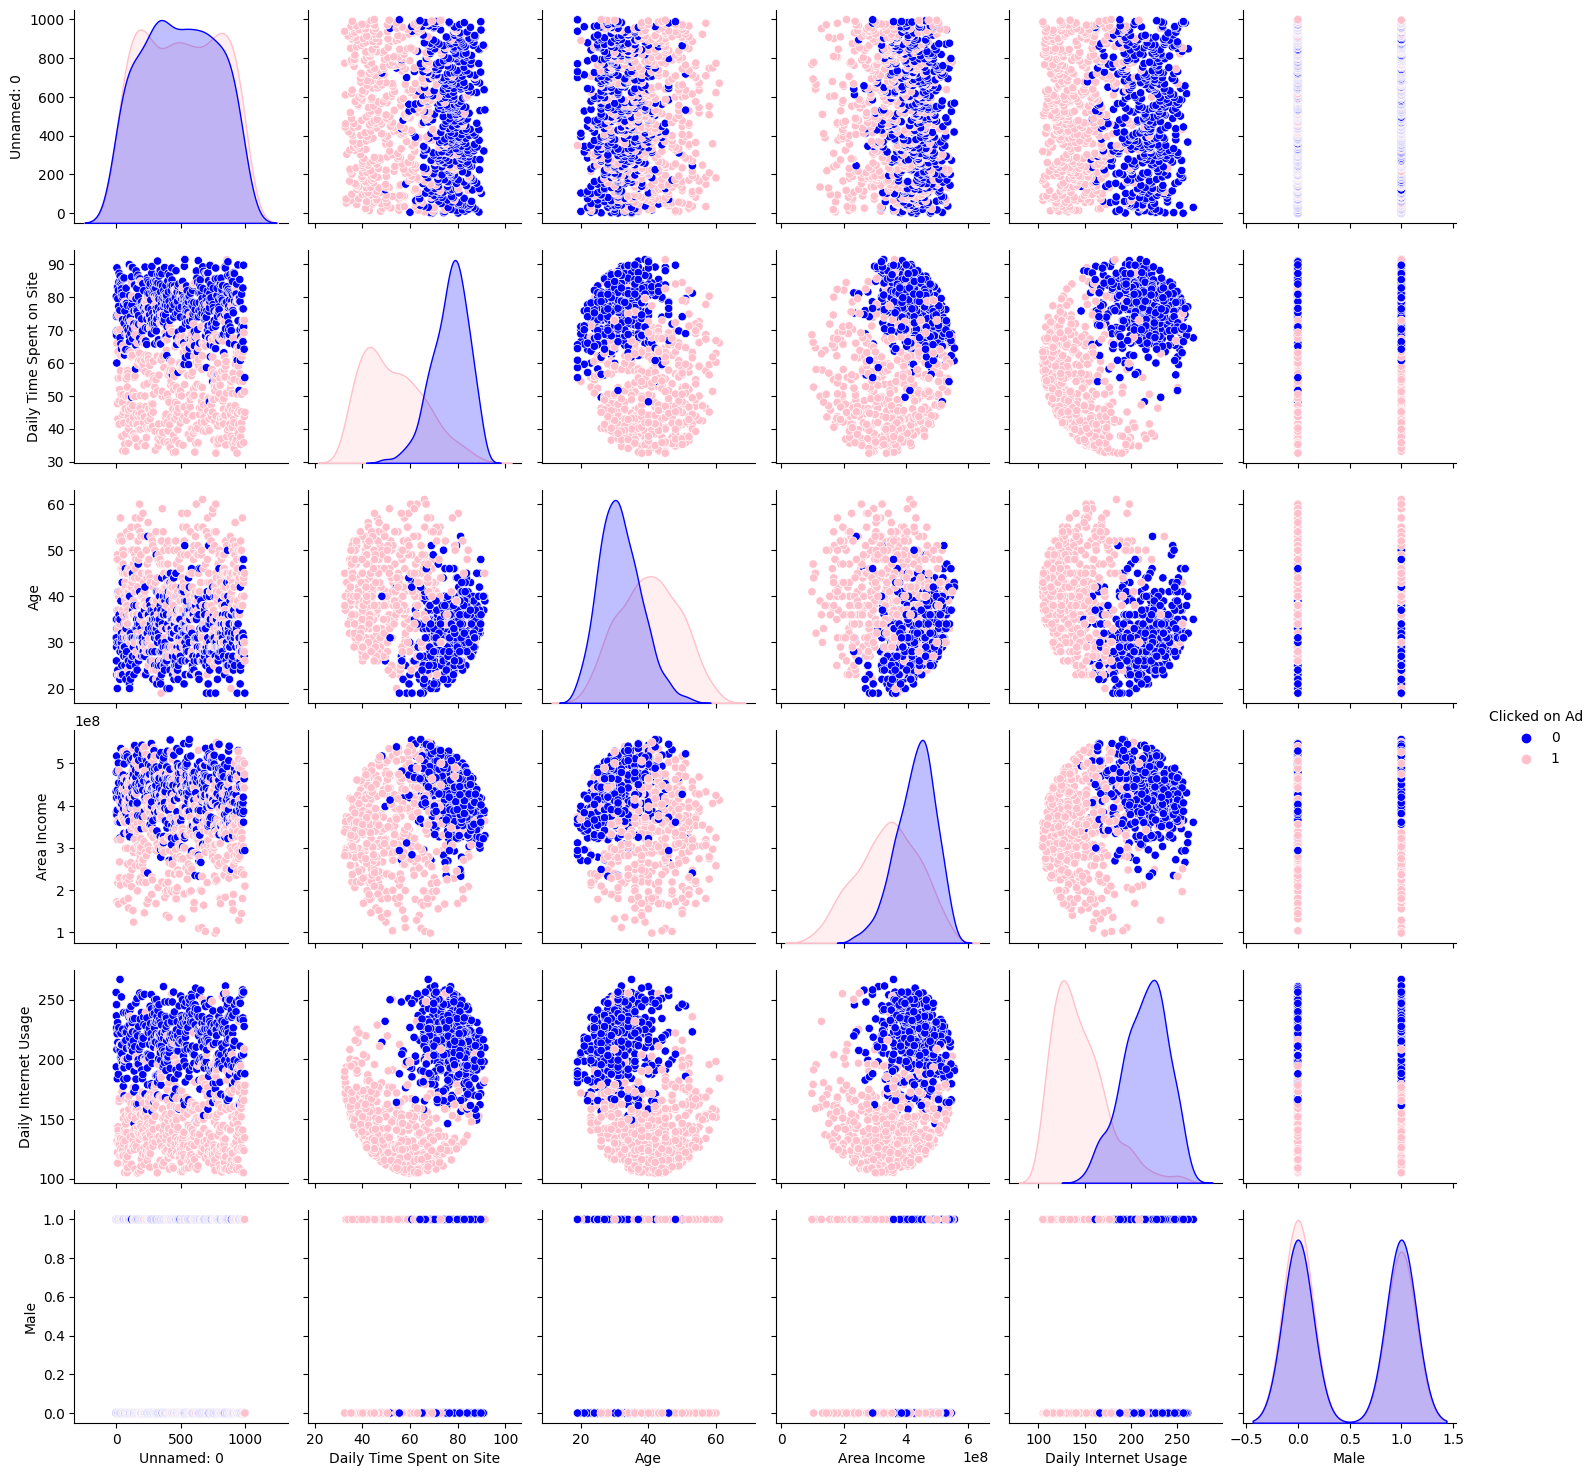

In [22]:
# Pairplot untuk melihat outlier dan distribusi

sns.pairplot(df, hue='Clicked on Ad', palette=['blue', 'pink'])
plt.show()

Beberapa poin hasil analisis pairplot:
1. Kolom Daily Time Spent on Site dengan variabel lain menunjukkan tren yang jelas dimana lebih banyak waktu yang dihabiskan di situs berkorelasi dengan kemungkinan lebih tinggi untuk meng-klik iklan. Plot kepadatan untuk fitur ini menunjukkan puncak yang berbeda untuk mereka yang meng-klik, keterlibatan dipengaruhi oleh waktu yang dihabiskan.
2. Area Income bukanlah faktor kuat yang menentukan pengunjung meng-klik iklan atau tidak.
3. Daily Internet Usage mungkin berinteraksi dengan iklan.

<h2>Ekstraksi Kolom Waktu</h2><br>

Melakukan ekstraksi kolom yang berhubungan dengan waktu.

In [12]:
#Melakukan ekstraksi pada kolom Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Week'] = df['Timestamp'].dt.isocalendar().week
df['Day'] = df['Timestamp'].dt.day

df.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Year,Month,Week,Day
540,540,77.47,36,493574130.0,222.91,1,2016-03-14 03:29:00,0,Bandung,Jawa Barat,Otomotif,2016,3,11,14
564,564,64.75,36,441007210.0,117.66,0,2016-04-06 01:19:00,1,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Travel,2016,4,14,6
754,754,76.87,36,510641320.0,212.59,0,2016-07-08 22:30:00,0,Surabaya,Jawa Timur,Electronic,2016,7,27,8
171,171,71.84,47,532024290.0,199.79,1,2016-05-08 22:47:00,0,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Furniture,2016,5,18,8
824,824,68.47,28,469233380.0,226.64,0,2016-06-25 00:33:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Electronic,2016,6,25,25


<h2>Menghapus Kolom</h2><br>

Melakukan penghapusan untuk kolom <b>Unnamed: 0</b> dan <b>Timestamp</b>.

In [13]:
# Menghapus kolom Unnamed: 0 dan Timestamp
df.drop(columns=['Unnamed: 0', 'Timestamp'], inplace=True)

In [14]:
df.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,city,province,category,Year,Month,Week,Day
75,64.10,22,423260040.0,215.93,0,0,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Food,2016,4,13,1
566,47.90,42,339273760.0,114.53,0,1,Pakanbaru,Riau,House,2016,2,8,24
994,43.70,28,441888720.0,173.01,0,1,Tasikmalaya,Jawa Barat,Fashion,2016,4,14,4
716,39.96,35,377292230.0,138.52,1,1,Depok,Jawa Barat,Food,2016,2,8,28
264,84.04,38,355065690.0,244.55,0,0,Bekasi,Jawa Barat,Health,2016,7,29,20


<h2>Featured Encoding</h2><br>

Pada data ini, terdapat beberapa kolom yang memiliki jenis data kategori, yaitu city, province, dan category. Tentu ini akan menyulitkan algoritma Machine Learning karena algoritma hanya dapat bekerja melalui data numerikal. Maka dari itu, setiap kolom tersebut dilakukan "One-Hot Encoding" agar lebih mudah dalam pengerjaannya.

In [15]:
df = pd.get_dummies(df, columns=['city', 'province', 'category'])
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Year,Month,Week,Day,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.0,256.09,0,0,2016,3,12,27,...,False,False,False,False,False,True,False,False,False,False
1,80.23,31,479092950.0,193.77,1,0,2016,4,14,4,...,False,False,False,False,True,False,False,False,False,False
2,69.47,26,418501580.0,236.50,0,0,2016,3,10,13,...,False,True,False,False,False,False,False,False,False,False
3,74.15,29,383643260.0,245.89,1,0,2016,1,1,10,...,False,False,False,False,False,False,False,True,False,False
4,68.37,35,517229930.0,225.58,0,0,2016,6,22,3,...,False,False,False,True,False,False,False,False,False,False


<h2>Feature dan Target</h2><br>

Split data antara feature dan target mengacu pada proses memisahkan dataset menjadi dua kelompok:
- Feature: Variabel yang digunakan untuk memprediksi target. Pada analisis kali ini feature adalah semua kolom kecuali kolom Clicked on Ad.
- Target: Variabel yang ingin di prediksi, pada penelitian kali ini kolom Clicked on Ad adalah targetnya.

In [16]:
features = df.drop(columns=['Clicked on Ad'])  # Mengambil semua kolom kecuali kolom target
target = df['Clicked on Ad']  # Mengambil kolom target

print("Features:")
print(features.sample(5))  # Menampilkan beberapa elemen pertama dari fitur

print("\nTarget:")
print(target.sample(5)) 

Features:
     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
837                     55.77   49  391594280.0                117.33     1   
439                     78.18   23  368842530.0                167.67     0   
103                     68.18   21  338632980.0                218.17     1   
71                      69.01   46  521806670.0                222.63     0   
770                     71.14   30  488308170.0                224.82     0   

     Year  Month  Week  Day  city_Balikpapan  ...  category_Bank  \
837  2016      3    11   15            False  ...          False   
439  2016      6    23    9            False  ...          False   
103  2016      2     6    9            False  ...          False   
71   2016      7    27    7            False  ...          False   
770  2016      6    25   21            False  ...          False   

     category_Electronic  category_Fashion  category_Finance  category_Food  \
837                False   

<h2>Machine Learning Model</h2><br>

Machine Learning Evaluation adalah proses menilai seberapa baik model Machine Learning kita bekerja. Ini melibatkan pengumpulan data, melatih model dengan data tersebut, lalu mengujinya pada data baru yang belum pernah dilihat model sebelumnya. Tujuannya adalah untuk mengetahui seberapa akurat model dalam membuat prediksi. Model yang digunakan untuk memprediksi adalah <b>Supervised Learning</b>. Beberapa algoritmanya adalah:<br>
- Logistic Regression<br>
- Decision Tree<br>
- Random Forest<br>
- K-Nearest Neighbor<br>
- Gradient Boositing Classifier<br>

1. Nilai 1 melabelkan pelanggan yang meng-klik iklan, sedangkan 0 melabelkan pelanggan yang tidak meng-klik iklan. Ada beberapa deskripsi berikut:
   * TP (True Positive): Model prediksi pelanggan meng-klik iklan, nyatanya meng-klik iklan.
   * TN (True Negative): Model prediksi pelanggan tidak meng-klik iklan, nyatanya tidak meng-klik iklan.
   * FP (False Positive): Model prediksi pelanggan meng-klik iklan, nyatanya tidak meng-klik iklan.
   * FN (False Negative): Model prediksi pelanggan tidak meng-kilik iklan, nyatanya meng-klik iklan.<br><br>
   
2. Hubungan antara True Positive (TP), True Negative (TN), False Positive (FP), dan False Negative (FN) dengan metrik evaluasi adalah sebagai berikut:<br>
<b>a. Akurasi (Accuracy)</b> <br>
Persentase prediksi yang benar dari total prediksi. Rumusnya adalah sebagai berikut:<br>
<b>Accuracy = (TP + TN)/(TP + TN + FP + FN)</b><br>
<b>b. Presisi (Precision)</b> <br>
<b>Precision = (TP)/(TP + FP)</b><br>
Dari semua prediksi positif, berapa banyak yang benar-benar positif. Ini mengukur akurasi dari prediksi positif.<br>
<b>c. Recall (Sensitivity, True Positive Rate)</b> <br>
Rumusnya adalah sebagai berikut:<br>
<b>Recall = (TP)/(TP + FN)</b><br>
Dari semua kasus positif, berapa banyak yang berhasil diprediksi dengan benar. Ini mengukur kemampuan model dalam mendeteksi posisif.<br>
<b>d. F1 Score (Sensitivity, True Positive Rate)</b> <br>
F1 Score adalah rata-rata harmonis dari presisi dan recall. Ini adalah metrik yang baik ketika ada ketidakseimbangan antara kelas positif dan negatif. Rumusnya adalah sebagai berikut:<br>
<b>F1 Score = 2 x (Precision + Recall)/(Precision x Recall)</b><br>
F1 Score memberikan keseimbangan antara presisi dan recall, sehingga cocok digunakan jika kita ingin mempertimbangkan keduanya secara bersamaan.<br><br>

3. Hubungan Singkat<br>
<b>Precision</b> mengukur proporsi prediksi positif yang benar. Semakin tinggi precision, semakin sedikit false positives, yang berarti model lebih akurat dalam memprediksi kasus positif.<br>
<b>Recall</b> mengukur proporsi kasus positif yang berhasil dideteksi oleh model. Semakin tinggi recall, semakin sedikit false negatives, yang menunjukkan kemampuan model untuk mendeteksi semua contoh positif.<br>
<b>Akurasi</b> merupakan metrik keseluruhan yang menunjukkan seberapa banyak dari total prediksi yang benar. Ini memberikan gambaran umum tentang kinerja model, tetapi bisa menyesatkan jika ada ketidakseimbangan kelas, karena bisa tetap tinggi meski model gagal mendeteksi kelas minoritas.<br>
<b>F1 Score</b> berfungsi sebagai ukuran keseimbangan antara precision dan recall. Ini sangat berguna dalam kasus di mana ada ketidakseimbangan antara jumlah positif dan negatif, karena menggabungkan kedua metrik tersebut menjadi satu metrik tunggal.

<h3>1. Split Data Tanpa Standardization</h3><br>

Split data adalah proses membagi dataset menjadi dua atau lebih subset, yang biasanya disebut training set dan test set. Tujuan utama dari pembagian ini adalah untuk melatih model pada satu bagian data (training set) dan menguji kinerjanya pada bagian lain yang tidak digunakan selama pelatihan (test set). Ini memastikan bahwa model dapat menggeneralisasi dengan baik dan tidak hanya bekerja baik pada data yang sudah pernah dilihat (overfitting). Pada kasus ini, 80% data didistribusikan untuk Data Latih, sedangkan 20% data digunakan untuk Data Uji

In [17]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi 80% untuk training dan 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Hasil split
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

Jumlah data train: 770
Jumlah data test: 193


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

<h4>1. 1. Logistic Regression</h4>

In [19]:
# Inisiasi model Logistic Regression
model_logreg = LogisticRegression()

# Train model
model_logreg.fit(X_train, y_train)

# Prediksi menggunakan data test
y_pred_logreg = model_logreg.predict(X_test)

# Hitung akurasi
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

In [20]:
# Prediksi pada data testing
y_pred_logreg = model_logreg.predict(X_test)

# Hitung metrik evaluasi
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, model_logreg.predict_proba(X_test)[:,1])

#Hasil confusion_matrix
print('\nConfusion Matrix Logistic Regression:')
print(cm_logreg)


Confusion Matrix Logistic Regression:
[[89  5]
 [ 4 95]]


In [21]:
# Hitung dan tampilkan nilai TP, TN, FP, FN dari confusion matrix
tn, fp, fn, tp = cm_logreg.ravel()

print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 95
True Negatives (TN): 89
False Positives (FP): 5
False Negatives (FN): 4


In [22]:
scores = cross_val_score(model_logreg, X_train, y_train, cv=5)
print("Cross-Validation Scores Logistic Regression:", scores)

Cross-Validation Scores Logistic Regression: [0.91558442 0.94155844 0.76623377 0.92207792 0.91558442]


<h4>1. 2. Desicion Tree</h4>

In [23]:
# Inisiasi model Decision Tree
model_dt = DecisionTreeClassifier()

# Train model
model_dt.fit(X_train, y_train)

# Prediksi menggunakan data test
y_pred_dt = model_dt.predict(X_test)

# Hitung akurasi
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [24]:
# Prediksi pada data testing
y_pred_dt = model_dt.predict(X_test)

# Hitung metrik evaluasi
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, model_dt.predict_proba(X_test)[:,1])

#Hasil confusion_matrix
print('\nConfusion Matrix Decision Tree:')
print(cm_dt)


Confusion Matrix Decision Tree:
[[89  5]
 [ 3 96]]


In [25]:
# Hitung dan tampilkan nilai TP, TN, FP, FN dari confusion matrix
tn, fp, fn, tp = cm_dt.ravel()

print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 96
True Negatives (TN): 89
False Positives (FP): 5
False Negatives (FN): 3


In [26]:
scores = cross_val_score(model_dt, X_train, y_train, cv=5)
print("Cross-Validation Scores Decision Tree:", scores)

Cross-Validation Scores Decision Tree: [0.92857143 0.96753247 0.92207792 0.96753247 0.96753247]


<h4>1. 3. Random Forest</h4>

In [27]:
# Inisiasi model Random Forest
model_rf = RandomForestClassifier()

# Train model
model_rf.fit(X_train, y_train)

# Prediksi menggunakan data test
y_pred_rf = model_rf.predict(X_test)

# Hitung akurasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [28]:
# Prediksi pada data testing
y_pred_rf = model_rf.predict(X_test)

# Hitung metrik evaluasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:,1])

#Hasil confusion_matrix
print('\nConfusion Matrix Random Forest:')
print(cm_rf)


Confusion Matrix Random Forest:
[[88  6]
 [ 1 98]]


In [29]:
# Hitung dan tampilkan nilai TP, TN, FP, FN dari confusion matrix
tn, fp, fn, tp = cm_rf.ravel() 

print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 98
True Negatives (TN): 88
False Positives (FP): 6
False Negatives (FN): 1


In [30]:
scores = cross_val_score(model_rf, X_train, y_train, cv=5)
print("Cross-Validation Scores Random Forest:", scores)

Cross-Validation Scores Random Forest: [0.93506494 0.96753247 0.94805195 0.98051948 0.96103896]


<h4>1. 4. KNN</h4>

In [31]:
# Inisiasi model KNN
model_knn = KNeighborsClassifier(n_neighbors=5)

# Train model
model_knn.fit(X_train, y_train)

# Prediksi menggunakan data test
y_pred_knn = model_knn.predict(X_test)

# Hitung akurasi
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [32]:
# Prediksi pada data testing
y_pred_knn = model_knn.predict(X_test)

# Hitung metrik evaluasi
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:,1])

#Hasil confusion_matrix
print('\nConfusion Matrix KNN:')
print(cm_knn)


Confusion Matrix KNN:
[[67 27]
 [43 56]]


In [33]:
# Hitung dan tampilkan nilai TP, TN, FP, FN dari confusion matrix
tn, fp, fn, tp = cm_knn.ravel()

print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 56
True Negatives (TN): 67
False Positives (FP): 27
False Negatives (FN): 43


In [34]:
scores = cross_val_score(model_knn, X_train, y_train, cv=5)
print("Cross-Validation Scores KNN:", scores)

Cross-Validation Scores KNN: [0.66233766 0.68181818 0.64285714 0.66883117 0.64285714]


<h4>1. 5. Gradient Boosting Classifier</h4>

In [35]:
# Inisiasi model Gradient Boosting Classifier
model_gb = GradientBoostingClassifier()

# Train model
model_gb.fit(X_train, y_train)

# Prediksi menggunakan data test
y_pred_gb = model_gb.predict(X_test)

# Hitung akurasi
accuracy_gb = accuracy_score(y_test, y_pred_gb)

In [36]:
# Prediksi pada data testing
y_pred_gb = model_gb.predict(X_test)

# Hitung metrik evaluasi
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
cm_gb = confusion_matrix(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, model_gb.predict_proba(X_test)[:,1])

#Hasil confusion_matrix
print('\nConfusion Matrix Gradient Boosting Classifier:')
print(cm_gb)


Confusion Matrix Gradient Boosting Classifier:
[[91  3]
 [ 3 96]]


In [37]:
# Hitung dan tampilkan nilai TP, TN, FP, FN dari confusion matrix
tn, fp, fn, tp = cm_gb.ravel()

print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 96
True Negatives (TN): 91
False Positives (FP): 3
False Negatives (FN): 3


In [38]:
scores = cross_val_score(model_gb, X_train, y_train, cv=5)
print("Cross-Validation Scores Gradient Boosting Classifier:", scores)

Cross-Validation Scores Gradient Boosting Classifier: [0.94155844 0.96103896 0.94155844 0.96103896 0.97402597]


<h4>Rangkuman Hasil Modeling</h4>

In [39]:
df_evaluasi = pd.DataFrame({
    'Model' : ['Logistic Regression','Decision Tree','Random Forest',
               'K-Nearest Neighbor','Gradient Boositing Classifier'],
    'Akurasi' : [accuracy_logreg, accuracy_dt, accuracy_rf,
                accuracy_knn, accuracy_gb],
    'Precision' : [precision_logreg, precision_dt, precision_rf,
                  precision_knn, precision_gb],
    'Recall' : [recall_logreg, recall_dt, recall_rf,
               recall_knn, recall_gb],
    'F1 Score' : [f1_logreg, f1_dt, f1_rf,
                 f1_knn, f1_gb]
})
df_evaluasi.round(4)

,Model,Akurasi,Precision,Recall,F1 Score
0,Logistic Regression,0.9534,0.9500,0.9596,0.9548
1,Decision Tree,0.9585,0.9505,0.9697,0.9600
2,Random Forest,0.9637,0.9423,0.9899,0.9655
3,K-Nearest Neighbor,0.6373,0.6747,0.5657,0.6154
4,Gradient Boositing Classifier,0.9689,0.9697,0.9697,0.9697


In [40]:
print('\nConfusion Matrix Logistic Regression:')
print(cm_logreg)

print('\nConfusion Matrix Decision Tree:')
print(cm_dt)

print('\nConfusion Matrix Random Forest:')
print(cm_rf)

print('\nConfusion Matrix KNN:')
print(cm_knn)

print('\nConfusion Matrix Gradient Boosting Classifier:')
print(cm_gb)


Confusion Matrix Logistic Regression:
[[89  5]
 [ 4 95]]

Confusion Matrix Decision Tree:
[[89  5]
 [ 3 96]]

Confusion Matrix Random Forest:
[[88  6]
 [ 1 98]]

Confusion Matrix KNN:
[[67 27]
 [43 56]]

Confusion Matrix Gradient Boosting Classifier:
[[91  3]
 [ 3 96]]


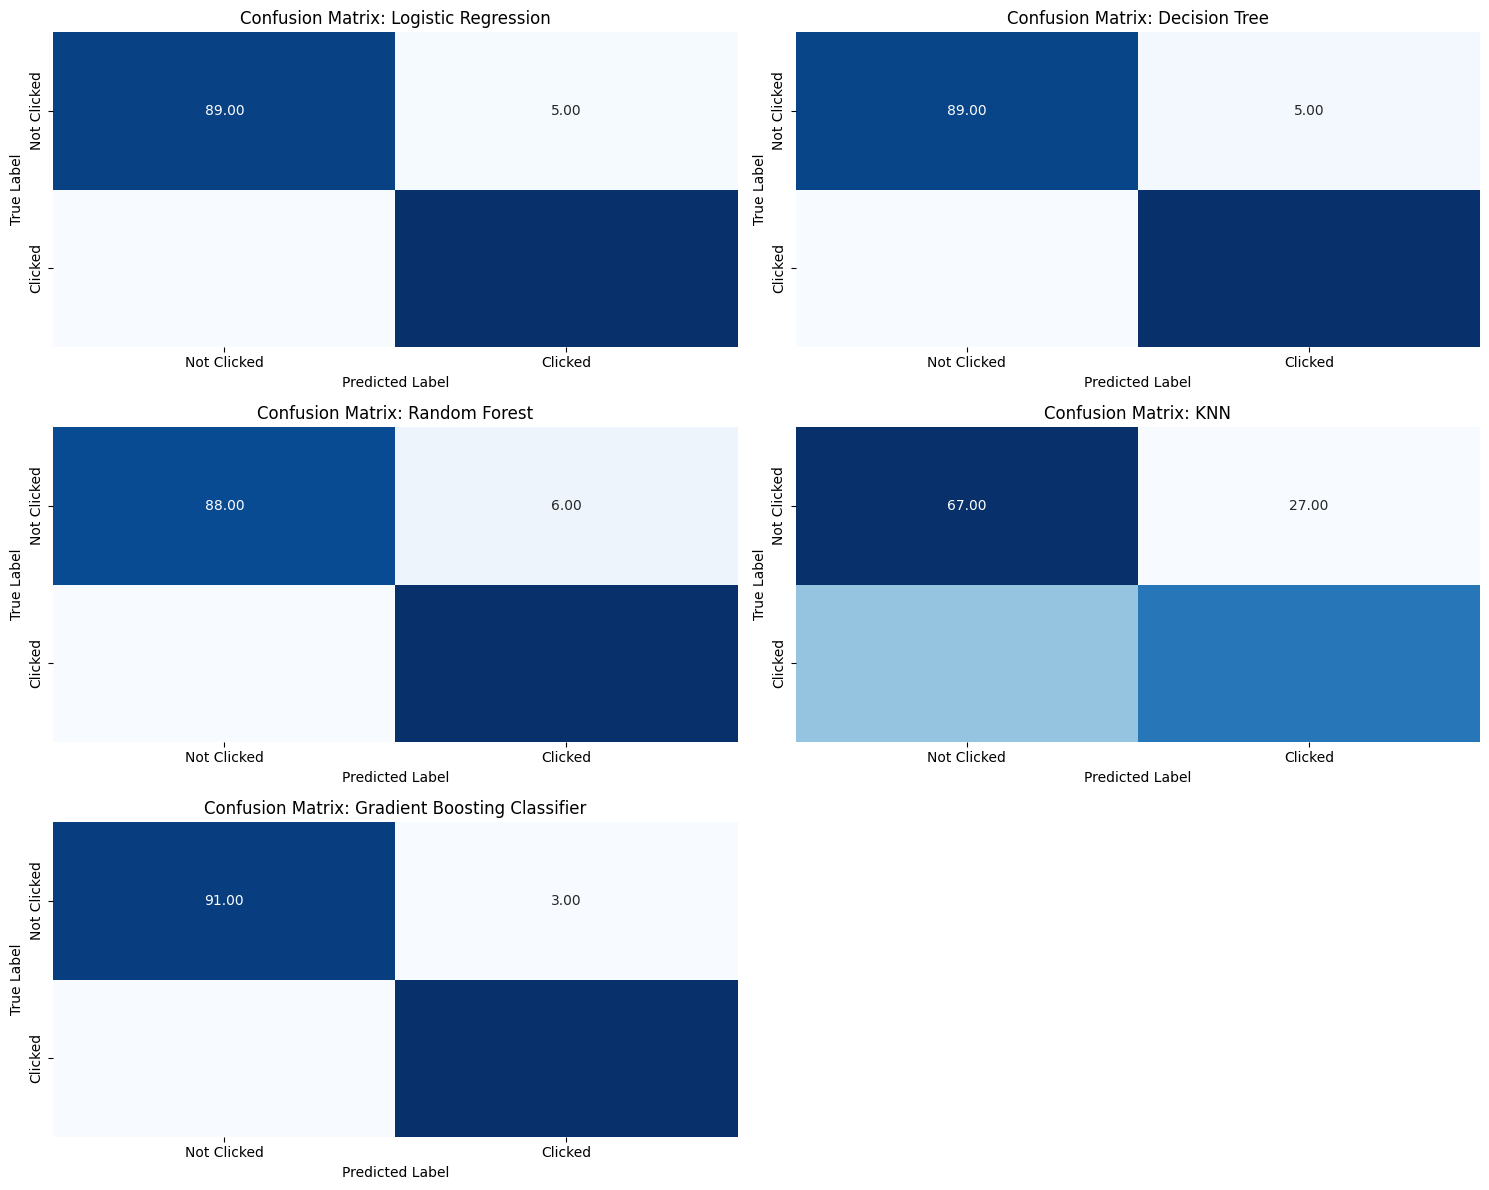

In [41]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Gradient Boosting Classifier']
confusion_matrices = [cm_logreg, cm_dt, cm_rf, cm_knn, cm_gb]

# Setup untuk visualisasi
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

# Loop melalui setiap matriks kebingungan dan model
for i, (model, cm) in enumerate(zip(models, confusion_matrices)):
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', cbar=False, ax=axes[i], 
                xticklabels=['Not Clicked', 'Clicked'], yticklabels=['Not Clicked', 'Clicked'])
    axes[i].set_title(f'Confusion Matrix: {model}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Hapus axis terakhir jika ada (3x2 grid)
if len(models) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Berdasarkan tabel dan confusion matrix diatas, didapatkan beberapa insight yaitu:
1. Performa Terbaik: <b>Random Forest</b> dan <b>Gradient Boosting Classifier</b> menunjukkan kinerja yang unggul di semua metrik, sehingga cocok untuk aplikasi yang mengutamakan keakuratan dan keandalan model.
2. Pesaing yang Solid: <b>Logistic Regression</b> dan <b>Decision Tree</b> memberikan solusi yang efektif dan dapat ditafsirkan yang memadai untuk tugas-tugas prediktif yang mudah.
3. Berkinerja buruk: <b>KNN</b> menunjukkan bahwa KNN tidak cocok untuk struktur dataset ini, kinerja yang kurang baik dengan jumlah false positives dan false negatives yang signifikan, menandakan bahwa model ini mungkin tidak cocok untuk data yang digunakan.
4. Kinerja Model: <b>Logistic Regression, Decision Tree, Random Forest, dan Gradient Boosting Classifier</b> menunjukkan kinerja yang baik dengan false positives dan false negatives yang rendah, menjadikannya lebih dapat diandalkan dalam memprediksi pengklik iklan.
6. Keanggunan Model: Model berbasis ensemble seperti <b>Random Forest</b> dan <b>Gradient Boosting Classifier</b> kemungkinan dapat lebih baik dalam menangani variasi data dan kompleksitas hubungan antar fitur.
5. Berfokus pada <b>precision</b>, ingin sebanyak mungkin dari prediksi yang di buat sebagai positif (dalam hal ini, pelanggan yang mengklik iklan) adalah benar-benar positif. Ini berarti ingin mengurangi jumlah <b>FP</b>, sehingga model lebih akurat dalam mengidentifikasi siapa yang benar-benar mengklik iklan. Dengan mengurangi <b>FP</b> dapat meningkatkan <b>nilai precision</b>.

<h3>2. Split Data Dengan Normalization</h3><br>

Featured transformation (transformasi fitur) adalah teknik dalam machine learning dan statistik untuk mengubah fitur data sehingga lebih mudah dianalisis atau digunakan oleh model prediktif. Metode yang digunakan adalah Min-Max Scaling yaitu mengubah data sehingga berada dalam rentang 0-1.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Membagi data menjadi 80% untuk training dan 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Melakukan standardScaler
scaler = MinMaxScaler()

# Melakukan standardScaler terhadap data training dan testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Output the sizes of the training and testing sets
print("Jumlah data train:", len(X_train_scaled))
print("Jumlah data test:", len(X_test_scaled))

Jumlah data train: 770
Jumlah data test: 193


<h4>2. 1. Logistic Regression dengan Normalizationn</h4>

In [43]:
# Inisiasi model Logistic Regression
model_logreg_scaled = LogisticRegression()

# Train model
model_logreg_scaled.fit(X_train_scaled, y_train)

# Prediksi menggunakan data test
y_pred_scaled_logreg = model_logreg_scaled.predict(X_test_scaled)

# Hitung akurasi
accuracy_scaled_logreg = accuracy_score(y_test, y_pred_scaled_logreg)

In [44]:
# Prediksi pada data testing
y_pred_logreg = model_logreg_scaled.predict(scaler.transform(X_test))  # Ensure you scale X_test too

# Hitung metrik evaluasi
precision_scaled_logreg = precision_score(y_test, y_pred_scaled_logreg)
recall_scaled_logreg = recall_score(y_test, y_pred_scaled_logreg)
f1_scaled_logreg = f1_score(y_test, y_pred_scaled_logreg)
cm_scaled_logreg = confusion_matrix(y_test, y_pred_scaled_logreg)
roc_scaled_auc_logreg = roc_auc_score(y_test, model_logreg_scaled.predict_proba(X_test_scaled)[:, 1])

In [45]:
# Hitung dan tampilkan nilai TP, TN, FP, FN dari confusion matrix
tn, fp, fn, tp = cm_scaled_logreg.ravel()

print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 95
True Negatives (TN): 91
False Positives (FP): 3
False Negatives (FN): 4


In [46]:
scores = cross_val_score(model_logreg_scaled, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores Logistic Regression With Normalizationn:", scores)

Cross-Validation Scores Logistic Regression With Normalizationn: [0.95454545 0.96753247 0.96103896 0.98051948 0.96753247]


<h4>2. 2. Desicion Tree dengan Normalization</h4>

In [47]:
# Inisiasi model Decision Tree
model_dt_scaled = DecisionTreeClassifier()

# Train model
model_dt_scaled.fit(X_train_scaled, y_train)

# Prediksi menggunakan data test
y_pred_scaled_dt = model_dt_scaled.predict(X_test_scaled)

# Hitung akurasi
accuracy_scaled_dt = accuracy_score(y_test, y_pred_scaled_dt)

In [48]:
# Prediksi pada data testing
y_pred_dt = model_dt_scaled.predict(scaler.transform(X_test))  # Ensure you scale X_test too

# Hitung metrik evaluasi
precision_scaled_dt = precision_score(y_test, y_pred_scaled_dt)
recall_scaled_dt = recall_score(y_test, y_pred_scaled_dt)
f1_scaled_dt = f1_score(y_test, y_pred_scaled_dt)
cm_scaled_dt = confusion_matrix(y_test, y_pred_scaled_dt)
roc_scaled_auc_dt = roc_auc_score(y_test, model_dt_scaled.predict_proba(X_test_scaled)[:, 1])

In [49]:
# Hitung dan tampilkan nilai TP, TN, FP, FN dari confusion matrix
tn, fp, fn, tp = cm_scaled_dt.ravel()

print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 95
True Negatives (TN): 89
False Positives (FP): 5
False Negatives (FN): 4


In [50]:
scores = cross_val_score(model_dt_scaled, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores Decision Tree With Normalization:", scores)

Cross-Validation Scores Decision Tree With Normalization: [0.92857143 0.95454545 0.91558442 0.96753247 0.96103896]


<h4>2. 3. Random Forest dengan Normalization</h4>

In [51]:
# Inisiasi model Random Forest
model_rf_scaled = RandomForestClassifier()

# Train model
model_rf_scaled.fit(X_train_scaled, y_train)

# Prediksi menggunakan data test
y_pred_scaled_rf = model_rf_scaled.predict(X_test_scaled)

# Hitung akurasi
accuracy_scaled_rf = accuracy_score(y_test, y_pred_scaled_dt)

In [52]:
# Prediksi pada data testing
y_pred_rf = model_rf_scaled.predict(scaler.transform(X_test))  # Ensure you scale X_test too

# Hitung metrik evaluasi
precision_scaled_rf = precision_score(y_test, y_pred_scaled_rf)
recall_scaled_rf = recall_score(y_test, y_pred_scaled_rf)
f1_scaled_rf = f1_score(y_test, y_pred_scaled_rf)
cm_scaled_rf = confusion_matrix(y_test, y_pred_scaled_rf)
roc_scaled_auc_rf = roc_auc_score(y_test, model_rf_scaled.predict_proba(X_test_scaled)[:, 1])

In [53]:
# Hitung dan tampilkan nilai TP, TN, FP, FN dari confusion matrix
tn, fp, fn, tp = cm_scaled_rf.ravel()

print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 98
True Negatives (TN): 88
False Positives (FP): 6
False Negatives (FN): 1


In [54]:
scores = cross_val_score(model_rf_scaled, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores Random Forest With Normalization:", scores)

Cross-Validation Scores Random Forest With Normalization: [0.94155844 0.96753247 0.96103896 0.98051948 0.97402597]


<h4>2. 4. KNN dengan Normalization</h4>

In [55]:
# Inisiasi model KNN
model_knn_scaled = KNeighborsClassifier(n_neighbors=5)

# Train model
model_knn_scaled.fit(X_train_scaled, y_train)

# Prediksi menggunakan data test
y_pred_scaled_knn = model_knn_scaled.predict(X_test_scaled)

# Hitung akurasi
accuracy_scaled_knn = accuracy_score(y_test, y_pred_scaled_dt)

In [56]:
# Prediksi pada data testing
y_pred_knn = model_knn_scaled.predict(scaler.transform(X_test))  # Ensure you scale X_test too

# Hitung metrik evaluasi
precision_scaled_knn = precision_score(y_test, y_pred_scaled_knn)
recall_scaled_knn = recall_score(y_test, y_pred_scaled_knn)
f1_scaled_knn = f1_score(y_test, y_pred_scaled_knn)
cm_scaled_knn = confusion_matrix(y_test, y_pred_scaled_knn)
roc_scaled_auc_knn = roc_auc_score(y_test, model_knn_scaled.predict_proba(X_test_scaled)[:, 1])

In [57]:
# Hitung dan tampilkan nilai TP, TN, FP, FN dari confusion matrix
tn, fp, fn, tp = cm_scaled_knn.ravel()

print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 74
True Negatives (TN): 73
False Positives (FP): 21
False Negatives (FN): 25


In [58]:
scores = cross_val_score(model_knn_scaled, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores KNN With Normalization:", scores)

Cross-Validation Scores KNN With Normalization: [0.79220779 0.77272727 0.78571429 0.76623377 0.69480519]


<h4>2. 5. Gradient Boosting Classifier dengan NormalizationStandardization</h4>

In [59]:
# Inisiasi model Gradient Boosting Classifier
model_gb_scaled = GradientBoostingClassifier()

# Train model
model_gb_scaled.fit(X_train_scaled, y_train)

# Prediksi menggunakan data test
y_pred_scaled_gb = model_gb_scaled.predict(X_test_scaled)

# Hitung akurasi
accuracy_scaled_gb = accuracy_score(y_test, y_pred_scaled_dt)

In [60]:
# Prediksi pada data testing
y_pred_gb = model_gb_scaled.predict(scaler.transform(X_test))  # Ensure you scale X_test too

# Hitung metrik evaluasi
precision_scaled_gb = precision_score(y_test, y_pred_scaled_gb)
recall_scaled_gb = recall_score(y_test, y_pred_scaled_gb)
f1_scaled_gb = f1_score(y_test, y_pred_scaled_gb)
cm_scaled_gb = confusion_matrix(y_test, y_pred_scaled_gb)
roc_scaled_auc_gb = roc_auc_score(y_test, model_gb_scaled.predict_proba(X_test_scaled)[:, 1])

In [61]:
# Hitung dan tampilkan nilai TP, TN, FP, FN dari confusion matrix
tn, fp, fn, tp = cm_scaled_gb.ravel()

print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 96
True Negatives (TN): 91
False Positives (FP): 3
False Negatives (FN): 3


In [62]:
scores = cross_val_score(model_gb_scaled, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores Gradient Boosting Classifier With Normalization:", scores)

Cross-Validation Scores Gradient Boosting Classifier With Normalization: [0.94155844 0.96103896 0.94155844 0.96753247 0.96753247]


<h4>Rangkuman Hasil Modeling With Normalization</h4>

In [63]:
df_evaluasi_with_normalization = pd.DataFrame({
    'Model With Normalization' : ['Logistic Regression With Normalization','Decision Tree With Normalization','Random Forest With Normalization',
               'K-Nearest Neighbor With Normalization','Gradient Boositing Classifier With Normalization'],
    'Akurasi' : [accuracy_scaled_logreg, accuracy_scaled_dt, accuracy_scaled_rf,
                accuracy_scaled_knn, accuracy_scaled_gb],
    'Precision' : [precision_scaled_logreg, precision_scaled_dt, precision_scaled_rf,
                  precision_scaled_knn, precision_scaled_gb],
    'Recall' : [recall_scaled_logreg, recall_scaled_dt, recall_scaled_rf,
               recall_scaled_knn, recall_scaled_gb],
    'F1 Score' : [f1_scaled_logreg, f1_scaled_dt, f1_scaled_rf,
                 f1_scaled_knn, f1_scaled_gb]
})
df_evaluasi_with_normalization.round(4)

,Model With Normalization,Akurasi,Precision,Recall,F1 Score
0,Logistic Regression With Normalization,0.9637,0.9694,0.9596,0.9645
1,Decision Tree With Normalization,0.9534,0.9500,0.9596,0.9548
2,Random Forest With Normalization,0.9534,0.9423,0.9899,0.9655
3,K-Nearest Neighbor With Normalization,0.9534,0.7789,0.7475,0.7629
4,Gradient Boositing Classifier With Normalization,0.9534,0.9697,0.9697,0.9697


In [64]:
print('\nConfusion Matrix Logistic Regression With Normalization:')
print(cm_scaled_logreg)

print('\nConfusion Matrix Decision Tree With Normalization:')
print(cm_scaled_dt)

print('\nConfusion Matrix Random Forest With Normalization:')
print(cm_scaled_rf)

print('\nConfusion Matrix KNN With Normalization:')
print(cm_scaled_knn)

print('\nConfusion Matrix Gradient Boosting Classifier With Normalization:')
print(cm_scaled_gb)


Confusion Matrix Logistic Regression With Normalization:
[[91  3]
 [ 4 95]]

Confusion Matrix Decision Tree With Normalization:
[[89  5]
 [ 4 95]]

Confusion Matrix Random Forest With Normalization:
[[88  6]
 [ 1 98]]

Confusion Matrix KNN With Normalization:
[[73 21]
 [25 74]]

Confusion Matrix Gradient Boosting Classifier With Normalization:
[[91  3]
 [ 3 96]]


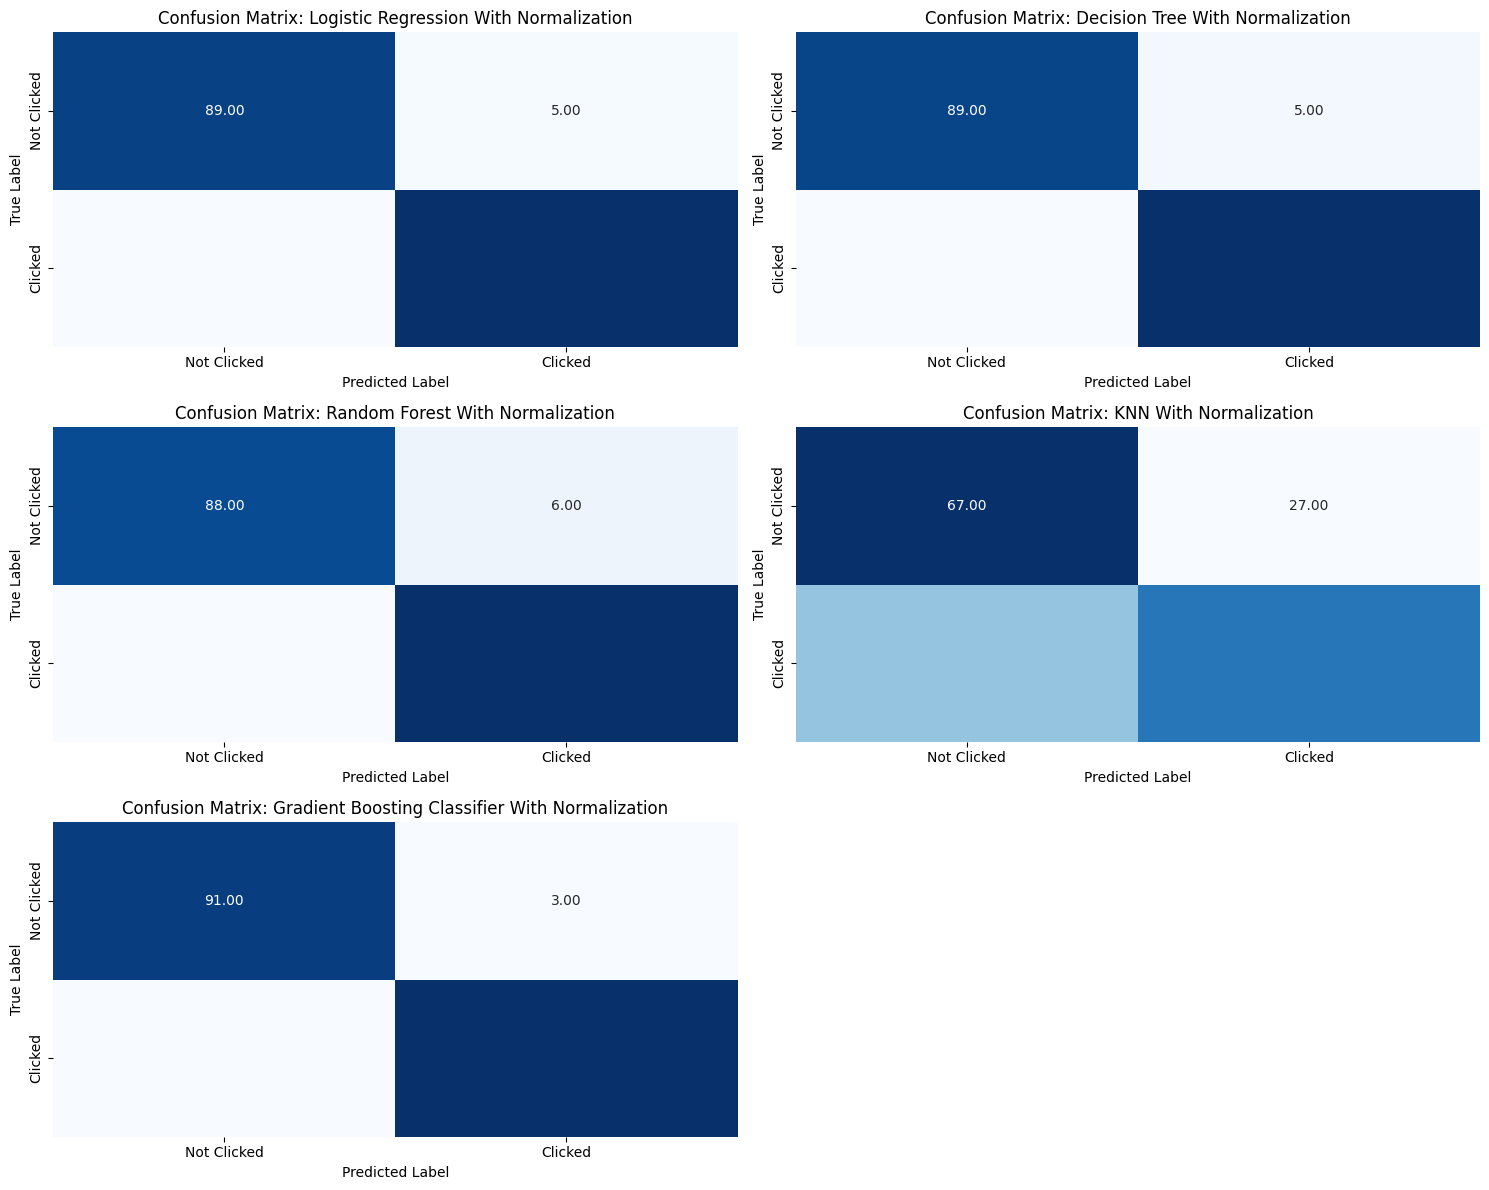

In [65]:
models_scaled = ['Logistic Regression With Normalization', 'Decision Tree With Normalization', 'Random Forest With Normalization',
                 'KNN With Normalization', 'Gradient Boosting Classifier With Normalization']
confusion_matrices_scaled = [cm_scaled_logreg, cm_scaled_dt, cm_scaled_rf, cm_scaled_knn, cm_scaled_gb]

# Setup untuk visualisasi
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

# Loop melalui setiap matriks kebingungan dan model
for i, (models_scaled, cm) in enumerate(zip(models_scaled, confusion_matrices)):
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', cbar=False, ax=axes[i], 
                xticklabels=['Not Clicked', 'Clicked'], yticklabels=['Not Clicked', 'Clicked'])
    axes[i].set_title(f'Confusion Matrix: {models_scaled}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Hapus axis terakhir jika ada (3x2 grid)
if len(models) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Berdasarkan tabel dan confusion matrix diatas, didapatkan beberapa insight yaitu:
1. Kinerja Model:
   * <b>Logistic Regression</b>, <b>Random Forest</b>, dan <b>Gradient Boosting Classifier</b> mendemonstrasikan kemampuan tinggi dalam mendeteksi <b>kelas positif dengan tingkat false positives yang rendah</b>. Ini menjadikannya pilihan yang baik dalam konteks di mana tindakan terhadap <b>prediksi positif berisiko tinggi atau mahal</b>.
   * <b>Decision Tree</b> juga menunjukkan kinerja baik, meskipun ada <b>peningkatan kecil dalam kesalahan (false positive)</b> dibandingkan <b>Logistic Regression</b>.
   * <b>KNN</b> menunjukkan <b>performa terburuk</b>, dengan kesalahan yang signifikan di kedua kelas. Ini membuktikan bahwa model ini mungkin kurang cocok untuk dataset ini.
2. Akurasi Prediksi:<br>
   Kinerja tinggi dari model seperti <b>Random Forest</b> dan <b>Gradient Boosting Classifier</b> menunjukkan bahwa keduanya mampu menangkap pola yang kompleks dalam data, berfungsi baik untuk masalah ini.
3. konteks periklanan, mengurangi <b>false positive</b> sangat penting untuk menghindari pengeluaran iklan yang tidak efektif. Model-model yang menunjukkan tingkat <b>false positives rendah</b> (<b>Logistic Regression</b>, <b>Random Forest</b>, <b>Gradient Boosting Classifier</b>) lebih disarankan untuk digunakan.

<h2>Feature Importance</h2>

In [66]:
from sklearn.inspection import permutation_importance

                          Logistic Regression  Decision Tree  Random Forest  \
Daily Time Spent on Site         2.708082e-02       0.192801       0.295619   
Age                              1.034986e-02       0.025905       0.092554   
Area Income                      1.325987e-08       0.061574       0.095880   
Daily Internet Usage             7.720584e-02       0.670884       0.361107   
Male                             7.358585e-05       0.000000       0.005492   
...                                       ...            ...            ...   
category_Furniture               2.318463e-05       0.000000       0.002885   
category_Health                  2.292787e-05       0.000000       0.003027   
category_House                   1.266136e-05       0.004675       0.002538   
category_Otomotif                2.670943e-05       0.000000       0.002079   
category_Travel                  3.290896e-05       0.000000       0.003097   

                               KNN  Gradient Boosti

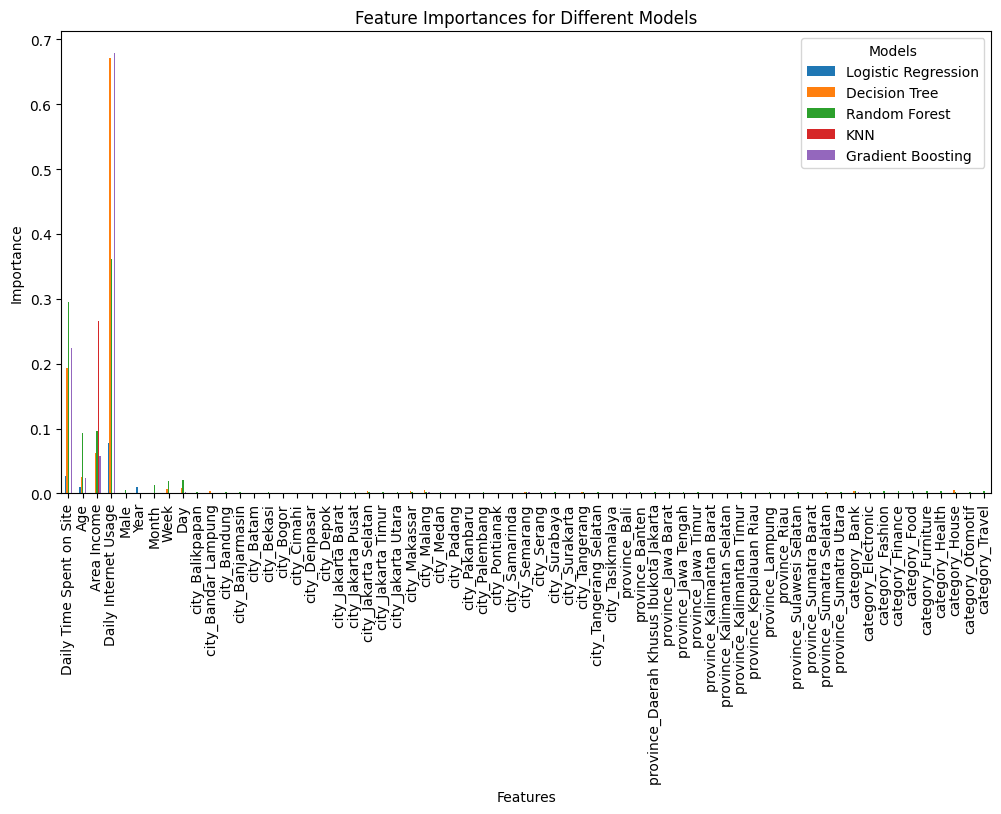

In [67]:
#Menentukan model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier()
}

#Sesuaikan setiap model dan kumpulkan feature importances
feature_importances = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    if name == "Logistic Regression":
        # Get absolute values of coefficients for logistic regression
        importances = abs(model.coef_[0])
    elif name in ["Decision Tree", "Random Forest", "Gradient Boosting"]:
        # For tree-based methods, use feature importances
        importances = model.feature_importances_
    elif name == "KNN":
        # Calculate permutation importance
        results = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)
        importances = results.importances_mean

    feature_importances[name] = importances

#Konfersi ke DataFrame untuk visualisasi
importance_df = pd.DataFrame(feature_importances, index=features.columns)

#Hasil feature importances
print(importance_df)

#Plot feature importances
importance_df.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances for Different Models')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.legend(title='Models')
plt.show()

                          Logistic Regression  Decision Tree  Random Forest  \
Daily Time Spent on Site             0.224703       0.224703       0.224703   
Age                                  0.022975       0.022975       0.022975   
Area Income                          0.058058       0.058058       0.058058   
Daily Internet Usage                 0.678552       0.678552       0.678552   
Male                                 0.000038       0.000038       0.000038   
...                                       ...            ...            ...   
category_Furniture                   0.000043       0.000043       0.000043   
category_Health                      0.000530       0.000530       0.000530   
category_House                       0.000002       0.000002       0.000002   
category_Otomotif                    0.000188       0.000188       0.000188   
category_Travel                      0.000274       0.000274       0.000274   

                               KNN  Gradient Boosti

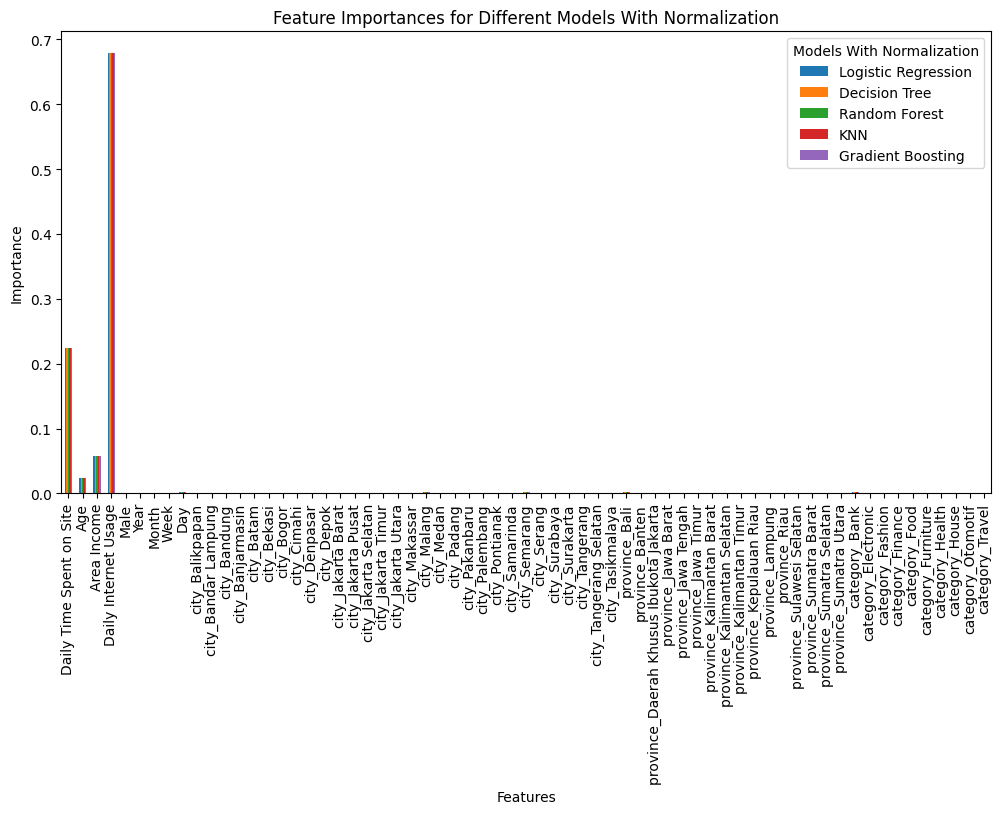

In [68]:
#Menentukan model
models_with_normalization = {
    "Logistic Regression With Normalization": LogisticRegression(max_iter=1000),
    "Decision Tree With Normalization": DecisionTreeClassifier(),
    "Random Forest With Normalization": RandomForestClassifier(),
    "KNN With Normalization": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting With Normalization": GradientBoostingClassifier()
}

#Sesuaikan setiap model dan kumpulkan feature importances
feature_importances_with_normalization = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    if name == "Logistic Regression With Normalization":
        # Get absolute values of coefficients for logistic regression
        importances = abs(model.coef_[0])
    elif name in ["Decision Tree With Normalization", "Random Forest With Normalization", "Gradient Boosting With Normalization"]:
        # For tree-based methods, use feature importances
        importances = model.feature_importances_
    elif name == "KNN With Normalization":
        # Calculate permutation importance
        results = permutation_importance(model, X_train_scaled, y_train, n_repeats=10, random_state=42)
        importances = results.importances_mean

    feature_importances_with_normalization[name] = importances
#Konfersi ke DataFrame untuk visualisasi
importance_df_with_normalization = pd.DataFrame(feature_importances_with_normalization, index=features.columns)

#Hasil feature importances
print(importance_df_with_normalization)

#Plot feature importances
importance_df_with_normalization.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances for Different Models With Normalization')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.legend(title='Models With Normalization')
plt.show()